In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv
import time

In [2]:
def B_a(a,gamma,e,r_p,b_0,b_3):
    return a**3*b_3+a**2*(3*b_3*gamma-2*e/(gamma*r_p))+a*(3*b_3*gamma**2-6*e/r_p)+b_0

def Q_a(a,gamma,q_5,b_3,e,r_p,b_0,q_0):
    return (a**5*q_5
           +a**4*(-6*b_3*e/(gamma*r_p)+5*gamma*q_5)
           +a**3*(-24*b_3*e/r_p+8*e**2/(gamma*r_p)**2+10*gamma**2*q_5)
           +a**2*(3*b_0*b_3-24*b_3*e*gamma/r_p-3*b_3**2*gamma**3+28*e**2/(gamma*r_p**2)+10*gamma**3*q_5)
           +a*(6*b_0*b_3*gamma-4*b_0*e/(gamma*r_p)-6*b_3**2*gamma**4+(4*e/r_p)**2+4*e*gamma**2*b_3/r_p+5*gamma**4*q_5)
           +q_0)

def R(a, gamma, e, r_p, b_0, b_3, q_0, q_5):
    return (a**6*(b_3**2-20*q_5/9)
           +a**5*(6*b_3**2*gamma+28*b_3*e/(3*gamma*r_p)-100*q_5*gamma/9)
           +a**4*(15*(b_3*gamma)**2+88*b_3*e/(3*r_p)-(124/9)*(e/(gamma*r_p))**2-200*q_5*gamma**2/9)
           +a**3*(-14*b_0*b_3/3+74*b_3**2*gamma**3/3+16*b_3*e*gamma/(3*r_p)-(344/(9*gamma))*(e/r_p)**2-200*q_5*gamma**3/9)
           +a**2*(-22*b_0*b_3*gamma/3+44*b_0*e/(9*gamma*r_p)+67*b_3**2*gamma**4/3-404*b_3*e*gamma**2/(9*r_p)+(4/9)*(e/r_p)**2-100*q_5*gamma**4/9)
           +a*(6*b_0*b_3*gamma**2-12*b_0*e/r_p-20*q_0/9)
           +b_0**2)

In [3]:
def B_crit(a,r_p,u_p,u_c,e,gamma):
    return (u_p*(a/r_p)**3
            +a**2*(3*u_p*gamma**4-2*e*(gamma*r_p)**2)/(gamma*r_p)**3
            +a*(3*u_p*gamma**5-6*e*gamma**3*r_p**2)/(gamma*r_p)**3
            +(gamma**6*u_p-4*e*gamma**4*r_p**2+u_c*gamma**2*r_p**4)/(gamma*r_p)**3)

def Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma):
    return (v_p*(a/r_p)**5
            +a**4*(5*v_p*gamma**6-6*e*u_p*gamma**4*r_p)/(gamma*r_p)**5
            +a**3*(10*v_p*gamma**7-24*e*u_p*gamma**5*r_p+8*e**2*(gamma*r_p)**3)/(gamma*r_p)**5
            +a**2*(10*v_p*gamma**8-36*e*u_p*gamma**6*r_p+gamma**4*r_p**3*(28*e**2+3*u_c*u_p))/(gamma*r_p)**5
            +a*(5*v_p*gamma**9-24*e*u_p*gamma**7*r_p+2*gamma**5*r_p**3*(16*e**2+3*u_c*u_p)-4*e*u_c*r_p**5*gamma**3)/(gamma*r_p)**5
            +(v_p*gamma**10-6*e*u_p*gamma**8*r_p+3*gamma**6*r_p**3*(4*e**2+u_c*u_p)-6*e*u_c*r_p**5*gamma**4+v_c*r_p**6*gamma**4)/(gamma*r_p)**5)

def f(c,a,r_p,u_p,v_p,u_c,v_c,e,gamma,E):
    return (a*c**2)/2+(B_crit(a,r_p,u_p,u_c,e,gamma)*c**4)/4+(Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma)*c**6)/6-E*c

def Elower(a,r_p,u_p,v_p,u_c,v_c,e,gamma):
    return (np.sqrt(10*(-3*B_crit(a,r_p,u_p,u_c,e,gamma)+np.sqrt(9*B_crit(a,r_p,u_p,u_c,e,gamma)**2
            -20*a*Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma)))/Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma))
            *(20*a*Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma)-3*B_crit(a,r_p,u_p,u_c,e,gamma)**2
            +B_crit(a,r_p,u_p,u_c,e,gamma)*np.sqrt(9*B_crit(a,r_p,u_p,u_c,e,gamma)**2
            -20*a*Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma)))/(250*Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma)))

def Eupper(a,r_p,u_p,v_p,u_c,v_c,e,gamma):
    return (np.sqrt(10*(-3*B_crit(a,r_p,u_p,u_c,e,gamma)-np.sqrt(9*B_crit(a,r_p,u_p,u_c,e,gamma)**2
            -20*a*Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma)))/Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma))
            *(20*a*Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma)-3*B_crit(a,r_p,u_p,u_c,e,gamma)**2
            -B_crit(a,r_p,u_p,u_c,e,gamma)*np.sqrt(9*B_crit(a,r_p,u_p,u_c,e,gamma)**2
            -20*a*Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma)))/(250*Q_crit(a,r_p,u_p,v_p,u_c,v_c,e,gamma)))

In [4]:
# E_L = np.array([Elower(aa,r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i]) for i in range(len(vals))])
# E_U = np.array([Eupper(aa,r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i]) for i in range(len(vals))])

In [5]:
# start = time.time()

# cvv = np.linspace(-5,5,1001)

# a_TT, E_TT = [], []

# for i in range(20):
#     att, Ett = [], []
#     for a in np.linspace(min(a_U[i]),max(a_U[i]),119):
#         for E in np.linspace(min(Eupper(np.array(a_U[i]),r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i])),max(Eupper(np.array(a_U[i]),r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i])),500):
#             f1 = f(cvv,a,r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i],E)

#             c1 = cvv[np.where((f1[1:]-f1[0:-1])>0)[0][0]]
#             c2 = cvv[np.where((f1[1:]-f1[0:-1])<0)[0][-1]]

#             if (abs(f(c1,a,r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i],E)-f(c2,a,r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i],E)) < 0.001) and (abs(c1-c2) > 0.1):
#                 att.append(a)
#                 Ett.append(E)
#                 break
    
#     a_TT.append(at)
#     E_TT.append(Et)

# end = time.time()
# print(end-start)

In [6]:
# start = time.time()

# cv = np.linspace(-5,5,1001)

# a_T, E_T = [], []

# for i in range(len(vals)):
#     at, Et = [], []
#     for a in np.linspace(min(a_U[i]),max(a_U[i]),119):
#         for E in np.linspace(min(Eupper(np.array(a_U[i]),r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i])),max(Eupper(np.array(a_U[i]),r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i])),1200):
#             f1 = f(cv,a,r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i],E)

#             c1 = cv[np.where((f1[1:]-f1[0:-1])>0)[0][0]]
#             c2 = cv[np.where((f1[1:]-f1[0:-1])<0)[0][-1]]

#             if (abs(f(c1,a,r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i],E)-f(c2,a,r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i],E)) < 0.001) and (abs(c1-c2) > 0.1):
#                 at.append(a)
#                 Et.append(E)
#                 break
    
#     a_T.append(at)
#     E_T.append(Et)

# end = time.time()
# print(end-start)

In [4]:
start = time.time()
b_0=0.9
b_3=0.5
q_0=0.9
q_5=0.9

e_val, r_c_val, r_p_val, gamma_val, u_p_val, u_c_val, v_c_val, v_p_val = [],[],[],[],[],[],[],[]

av = np.linspace(0,4,41)

for i in np.linspace(-1,1,21): #e
    for j in np.linspace(-1,1,21): #gamma
        for k in np.linspace(-1,1,21): #r_p
            al = np.linspace(0,20,2001)
            if all(Q_a(al,j,q_5,b_3,i,k,b_0,q_0) > 0) and (min(B_a(al,-1,-1,-1,b_0,b_3)) < 0):
                for n in av:
                    if (B_a(n,j,i,k,b_0,b_3) < 0) and (R(n,j, i, k, b_0, b_3, q_0, q_5) > 0):
                        v = np.linspace(-2,8,1001)
                        
#                         plt.figure(figsize=(11,8))
#                         plt.plot(v,B_a(v,j,i,k,b_0,b_3), label='B(a)',color='b')
#                         plt.plot(v,Q_a(v,j,q_5,b_3,i,k,b_0,q_0),label='Q(a)',color='r')
#                         plt.plot(v,R(v,j,i,k,b_0,b_3,q_0,q_5),label='R(a)',color='g')
#                         plt.gca().spines['left'].set_position('zero')
#                         plt.gca().spines['bottom'].set_position('zero')
#                         plt.gca().spines['right'].set_color('none')
#                         plt.gca().spines['top'].set_color('none')
#                         plt.gca().xaxis.set_ticks_position('bottom')
#                         plt.gca().yaxis.set_ticks_position('left')
#                         yticks = plt.gca().yaxis.get_major_ticks()
#                         yticks[3].label1.set_visible(False)
#                         xticks = plt.gca().xaxis.get_major_ticks()
#                         xticks[1].label1.set_visible(False)
#                         plt.gca().xaxis.set_label_coords(1.03,0.52)
#                         plt.xlabel('a',fontsize=16)
#                         plt.title('B(a), Q(a), and R(a)',fontsize=16, y=1.01)
#                         plt.legend(loc='best',fontsize=18)
#                         plt.xlim(-0.2,3)
#                         plt.ylim(-5,5)
                        
#                         plt.show()
                        
                        e_val.append(i)
                        r_c_val.append(j*(j+n)/k)
                        r_p_val.append(k)
                        gamma_val.append(j)
                        u_p_val.append(b_3*k**3)
                        u_c_val.append(j*(b_0*k-b_3*j**3*k+4*i*j)/k**2)
                        v_c_val.append(j*(-3*b_0*b_3*(j*k)**2+6*b_0*i*k+3*j**5*(b_3*k)**2-12*b_3*i*j**3*k+12*i**2*j-j**5*q_5*k**2+q_0*k**2)/k**3)
                        v_p_val.append(q_5*k**5)
                        
vals = []
coeffs = ['e','rc','rp','gamma','up','uc','vc','vp']
for i in range(len(e_val)):
    vals.append(dict(zip(coeffs,[e_val[i], r_c_val[i], r_p_val[i], gamma_val[i], u_p_val[i], u_c_val[i], v_c_val[i], v_p_val[i]])))
    
def WriteDictToCSV(csv_file,csv_columns,dict_data):
    try:
        with open(csv_file, 'w+') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
            writer.writeheader()
            for data in dict_data:
                writer.writerow(data)
    except IOError as err:
        errno,strerror = err.args
        print("I/O error({0}): {1}".format(errno, strerror))    
    return

WriteDictToCSV("params.csv",coeffs,vals)

end = time.time()
print(end-start)

10.0560142993927


/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:10: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:10: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:10: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:10: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:15: RuntimeWarning: invalid value encountered in greater


In [5]:
start = time.time()
a_L, a_U = [], []

for i in range(len(vals)):
    aL, aU = [], []
    for a in np.linspace(0.2,10,1500):
        if np.real(Elower(a,r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i])) == Elower(a,r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i]):
            aL.append(a)

        if np.real(Eupper(a,r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i])) == Eupper(a,r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i]):
            aU.append(a)
            
    a_L.append(aL)
    a_U.append(aU)

end = time.time()
print(end-start)

182.7475986480713


/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:23: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:30: RuntimeWarning: invalid value encountered in sqrt


In [6]:
start = time.time()

cvv = np.linspace(-5,5,1001)

a_TT, E_TT = [], []

for i in range(len(vals)):
    att, Ett = [], []
    for a in np.linspace(min(a_U[i]),max(a_U[i]),119):
        for E in np.linspace(min(Eupper(np.array(a_U[i]),r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i])),max(Eupper(np.array(a_U[i]),r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i])),500):
            f1 = f(cvv,a,r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i],E)

            c1 = cvv[np.where((f1[1:]-f1[0:-1])>0)[0][0]]
            c2 = cvv[np.where((f1[1:]-f1[0:-1])<0)[0][-1]]

            if (abs(f(c1,a,r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i],E)-f(c2,a,r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i],E)) < 0.001) and (abs(c1-c2) > 0.1):
                att.append(a)
                Ett.append(E)
                break
    
    a_TT.append(att)
    E_TT.append(Ett)

end = time.time()
print(end-start)

3157.59170794487


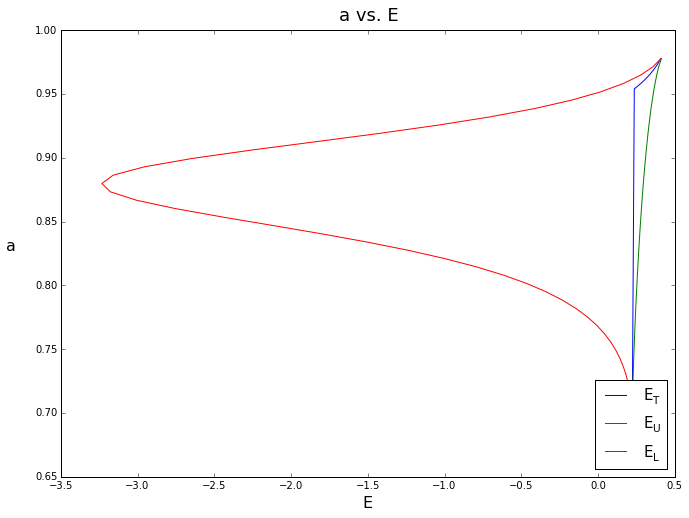

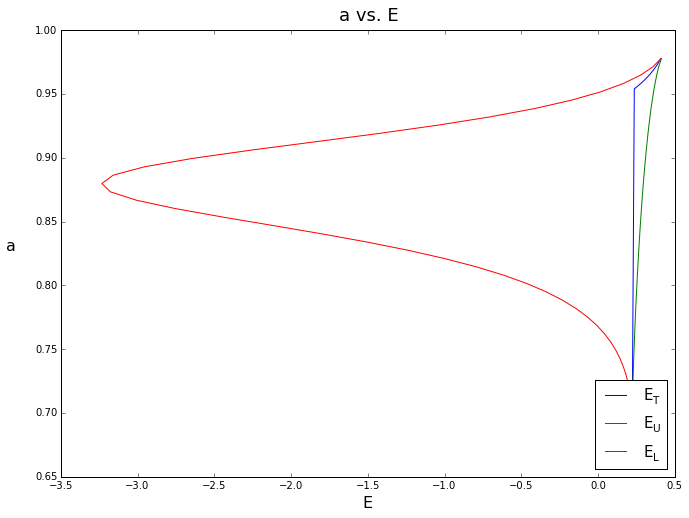

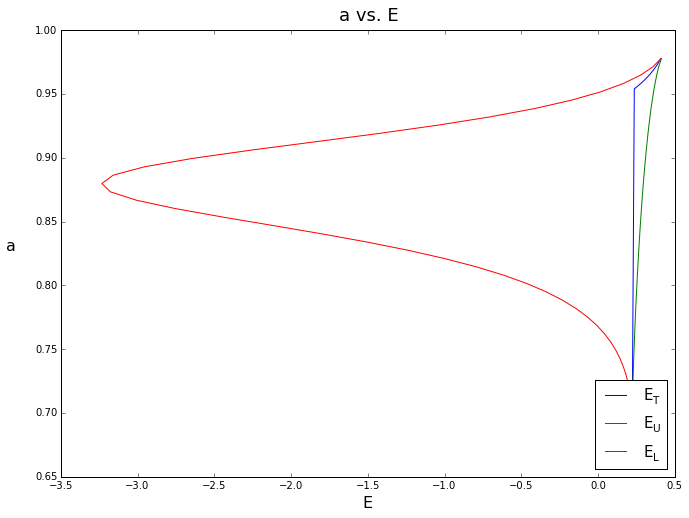

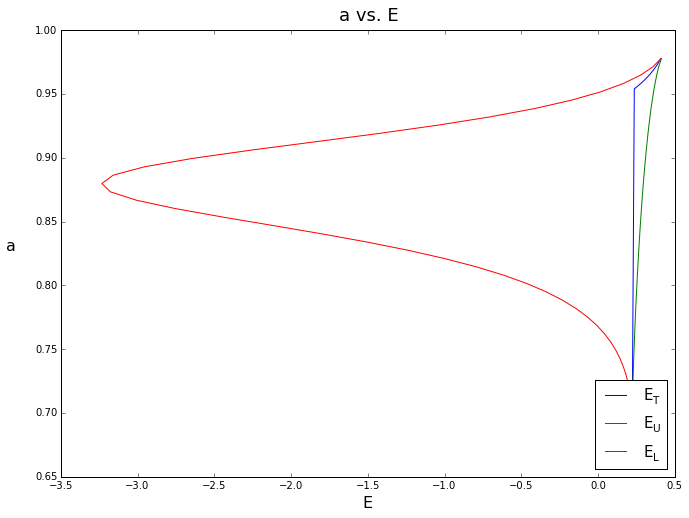

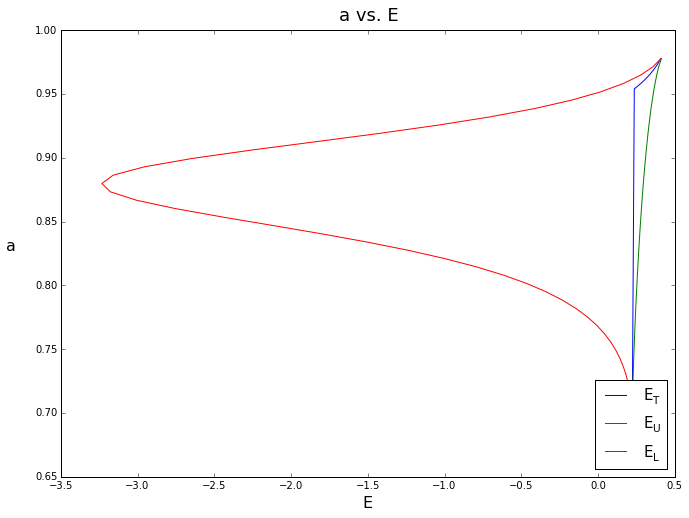

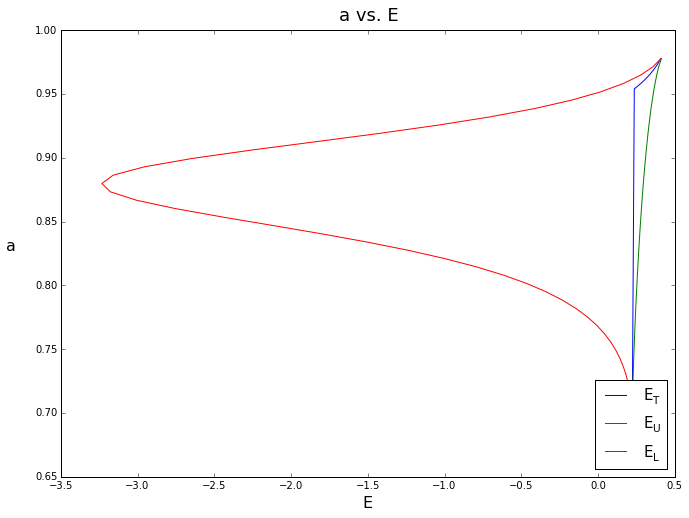

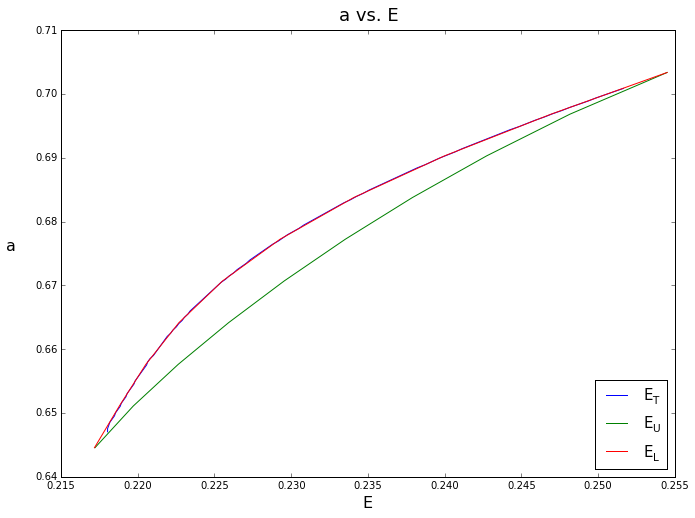

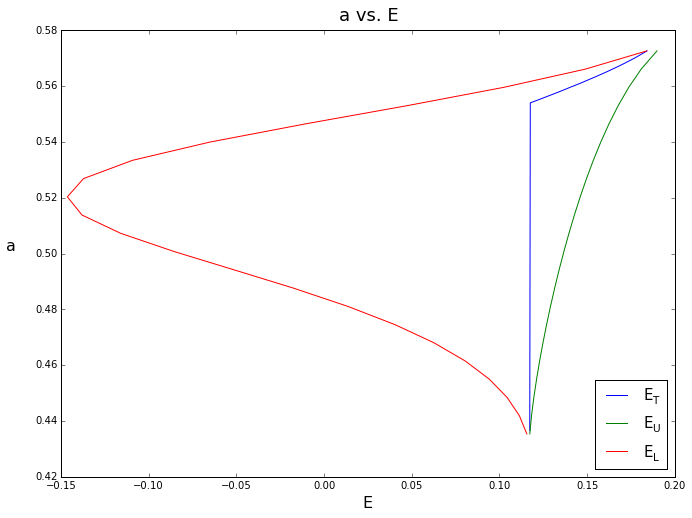

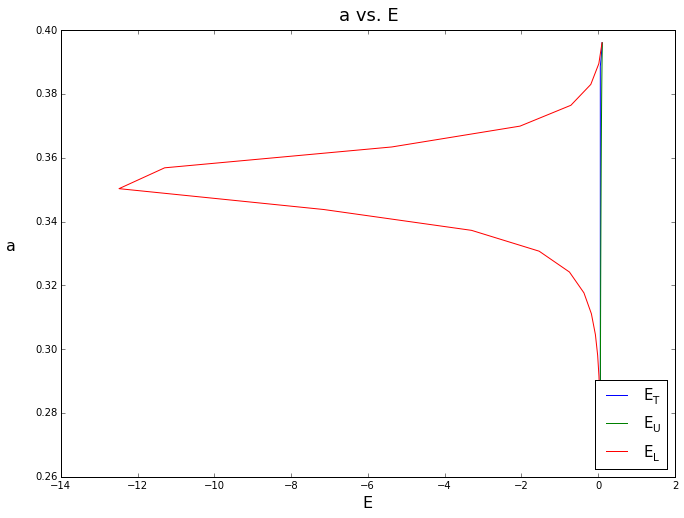

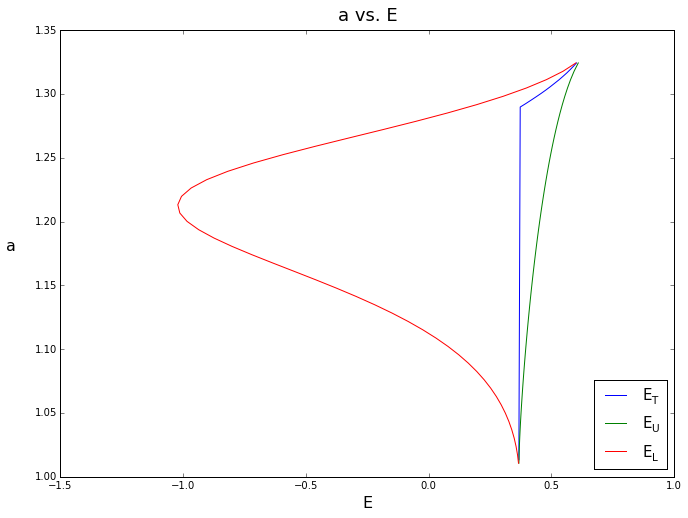

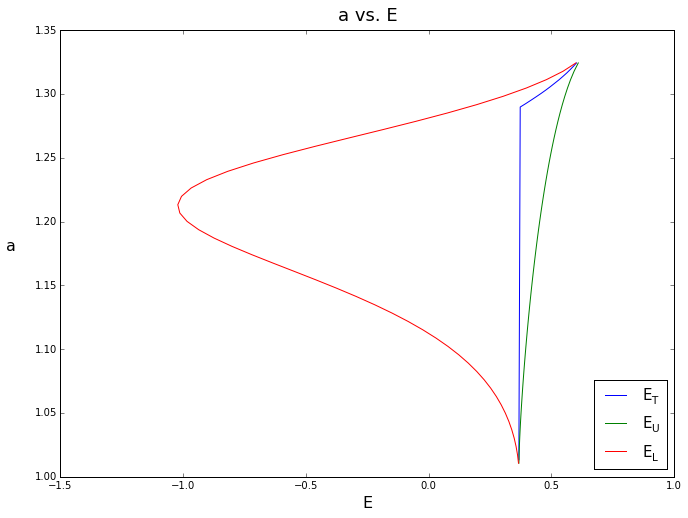

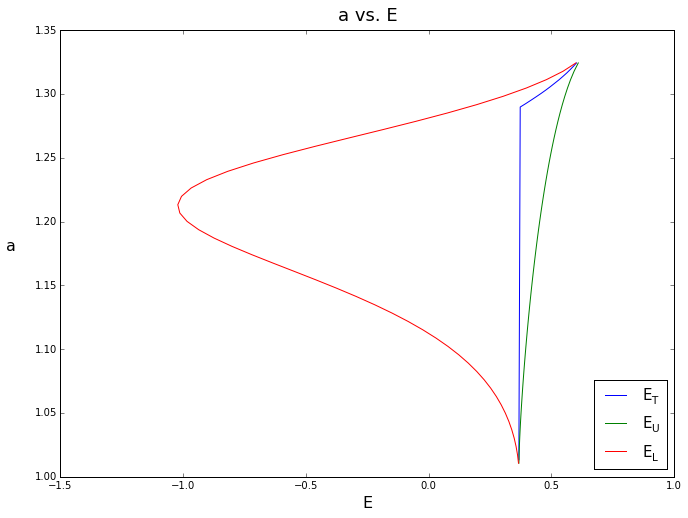

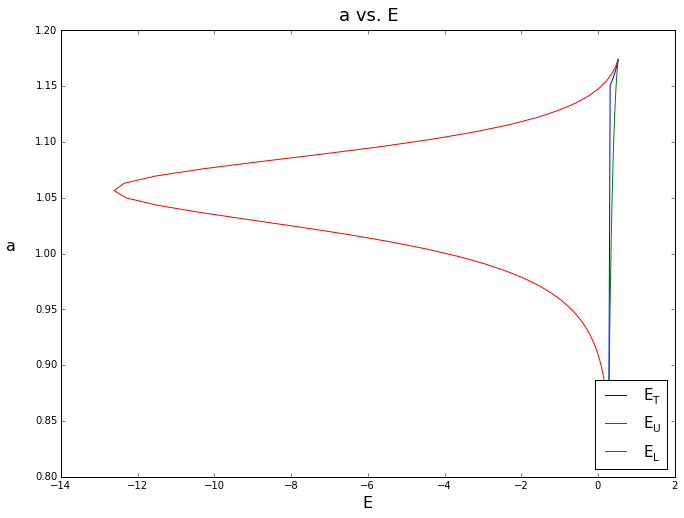

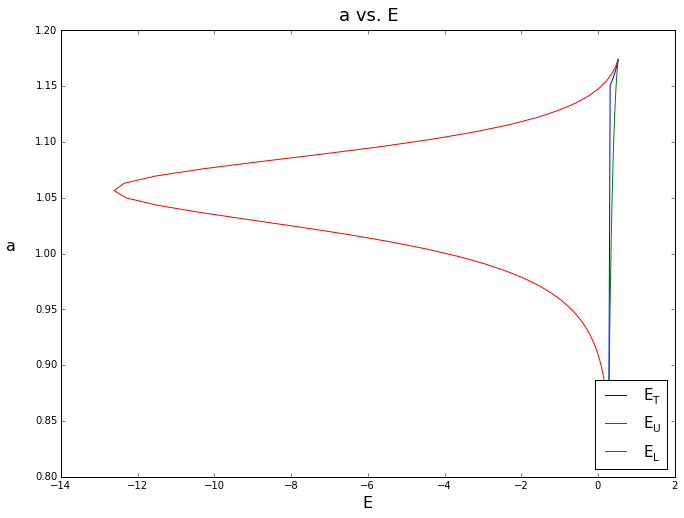

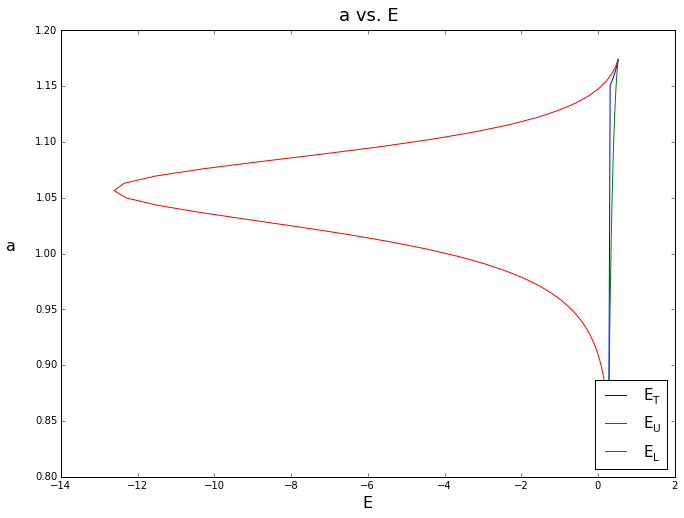

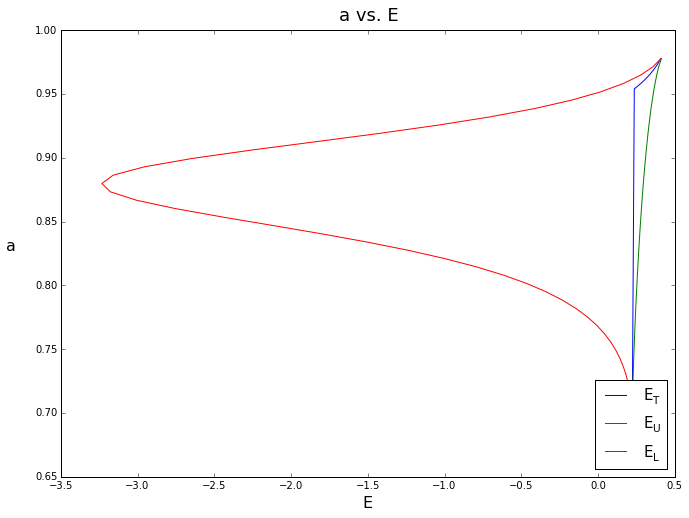

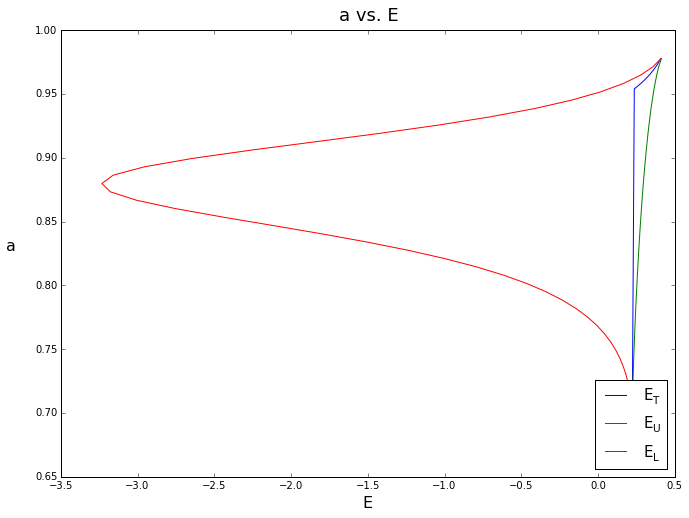

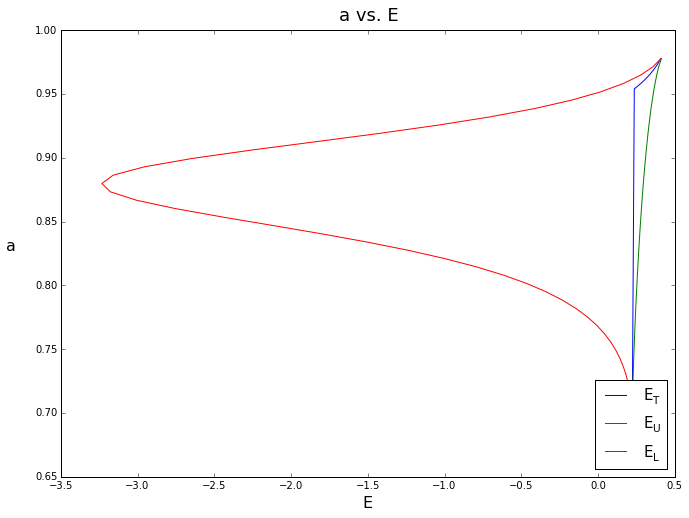

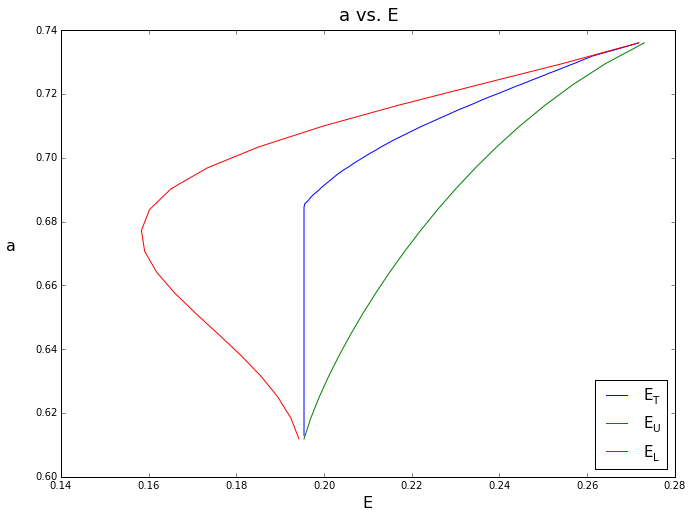

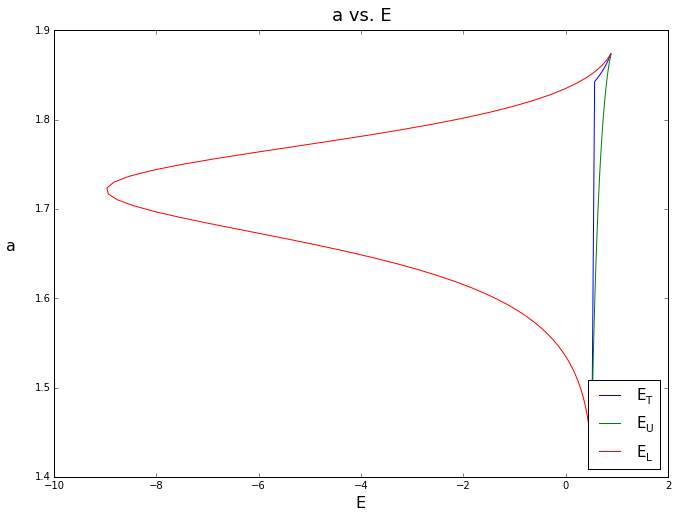

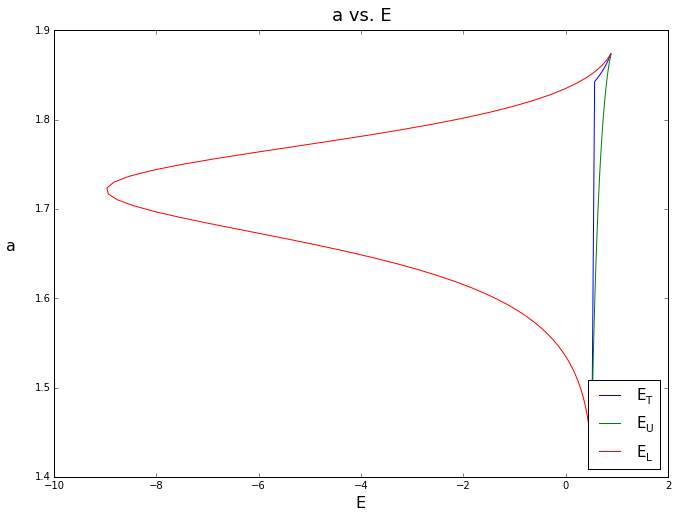

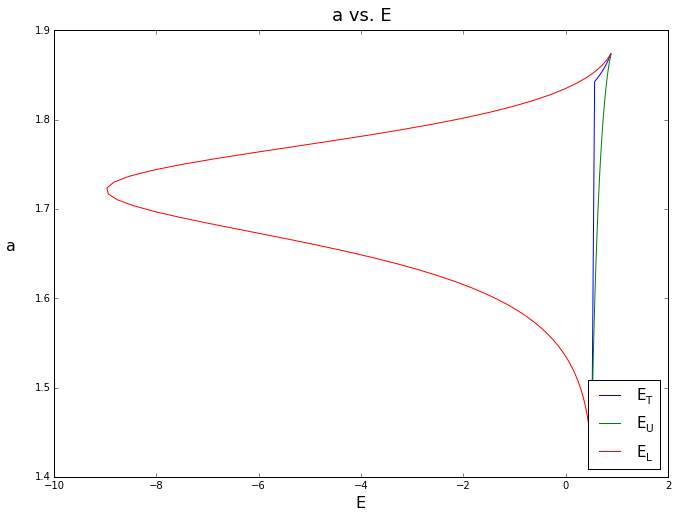

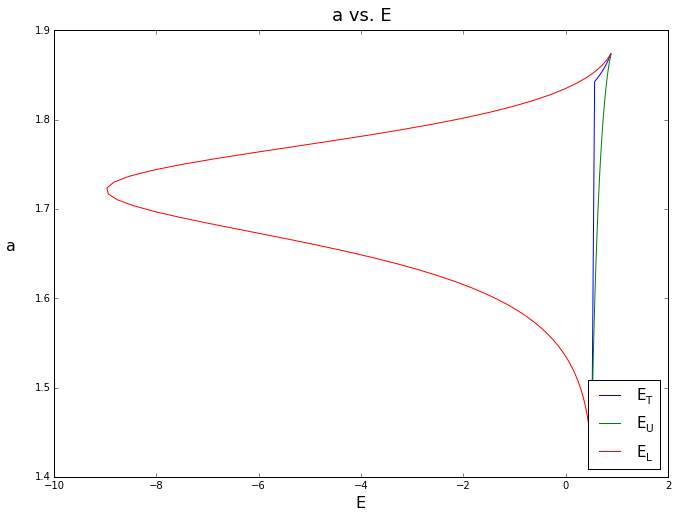

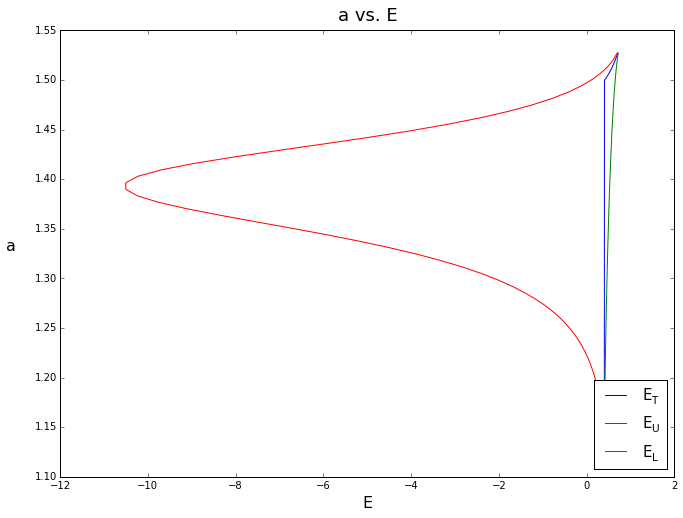

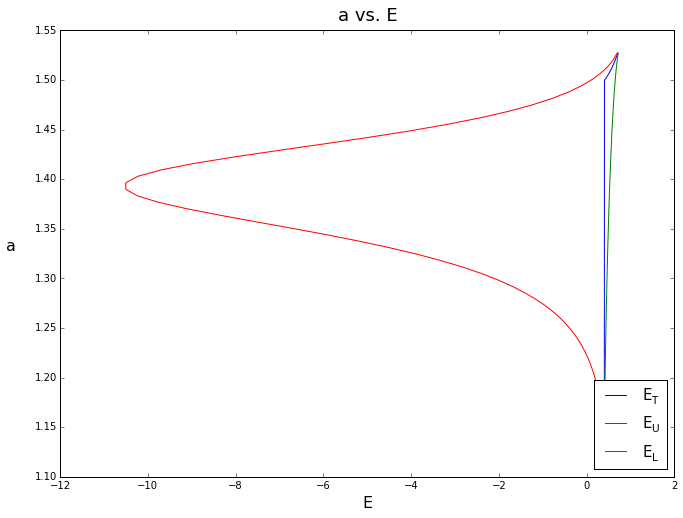

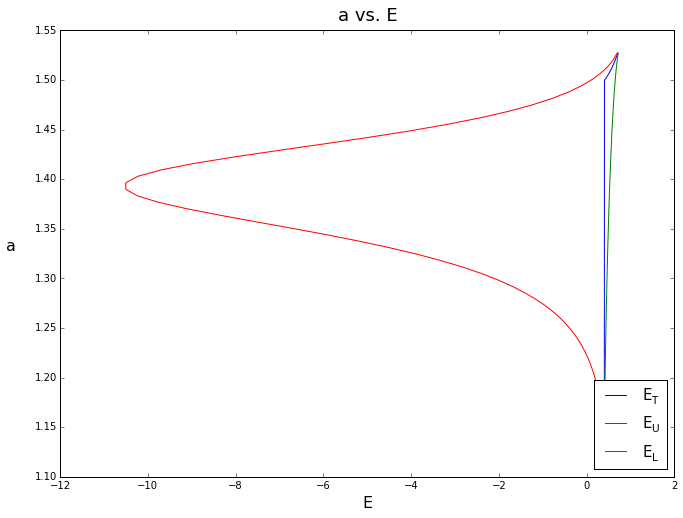

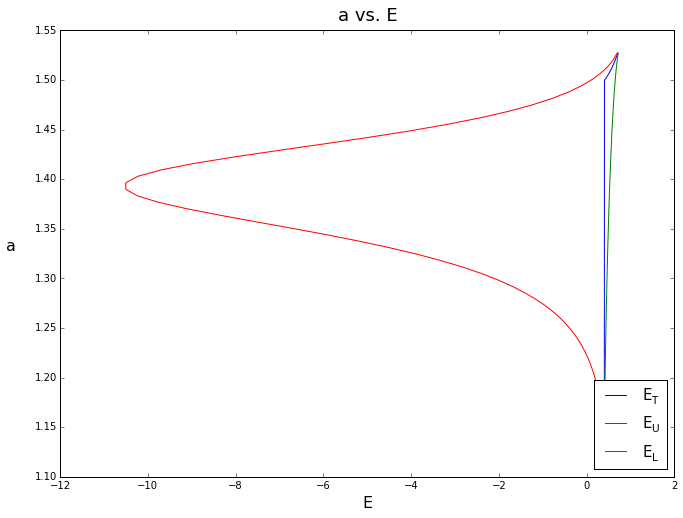

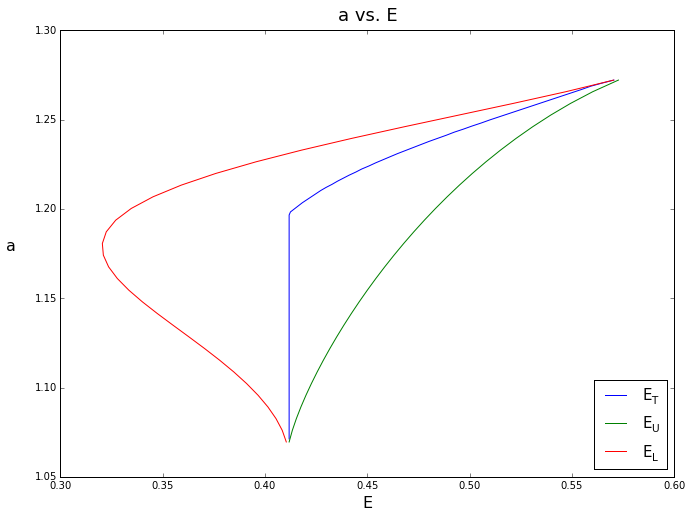

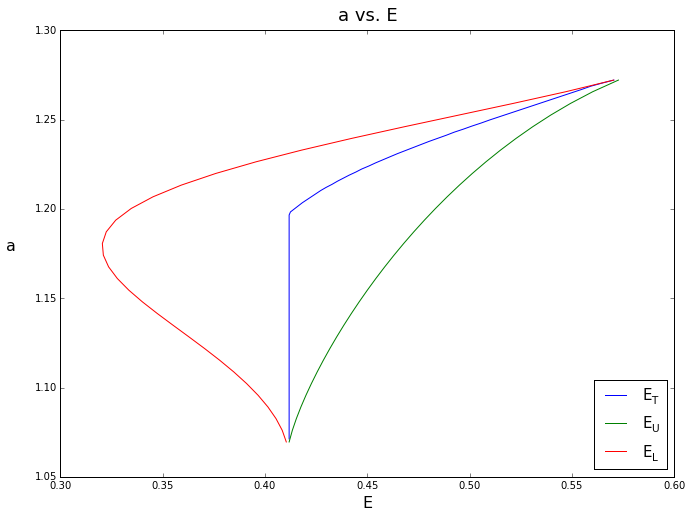

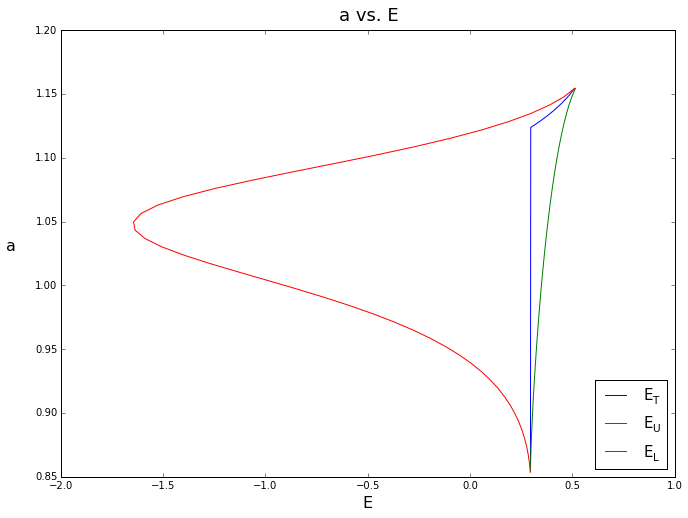

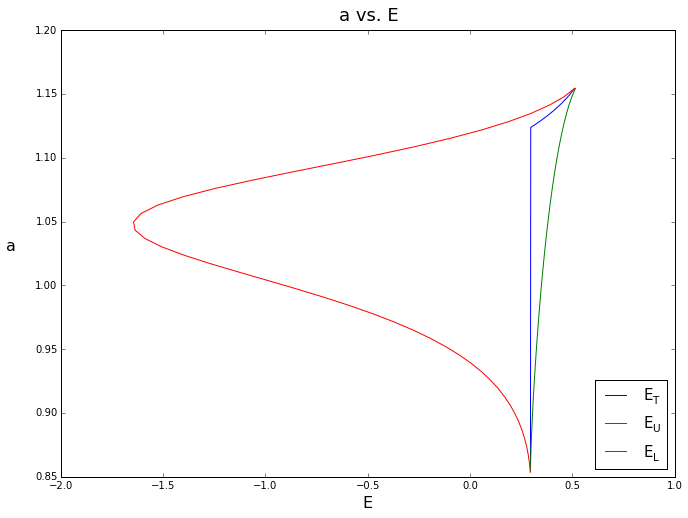

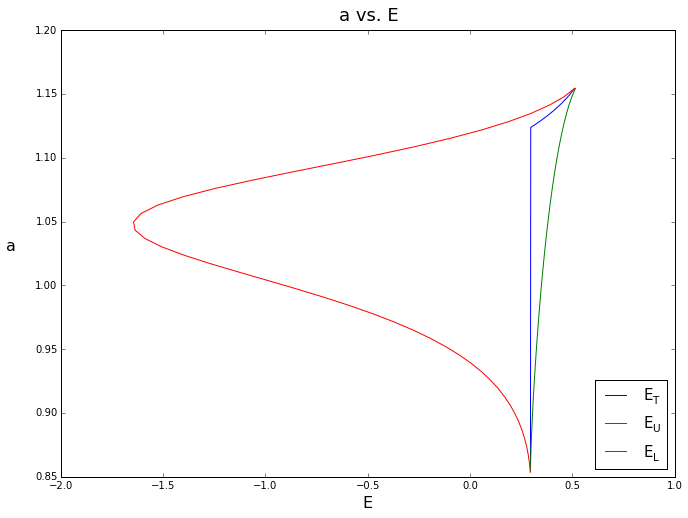

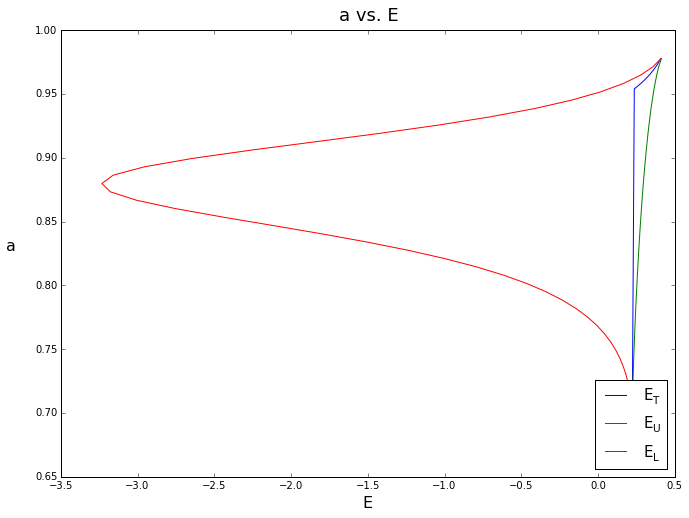

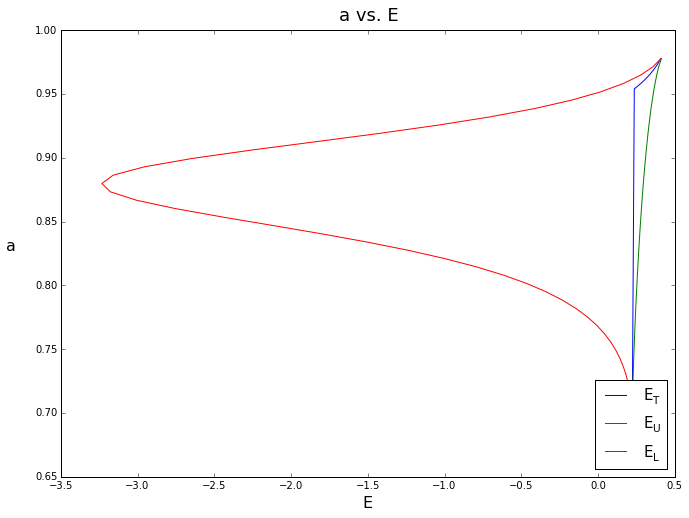

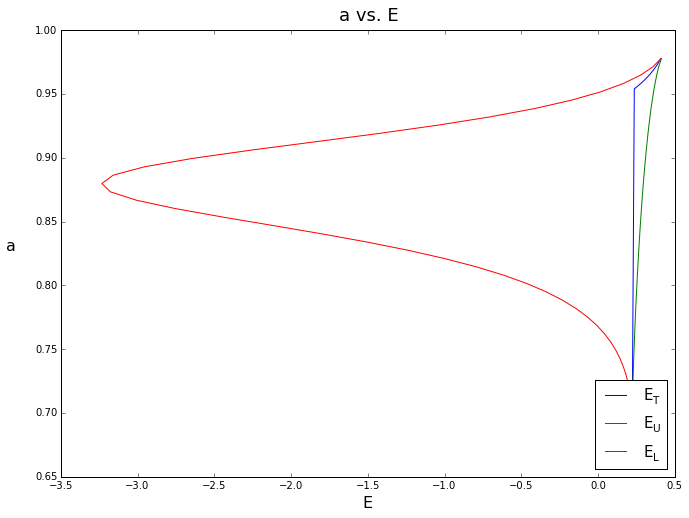

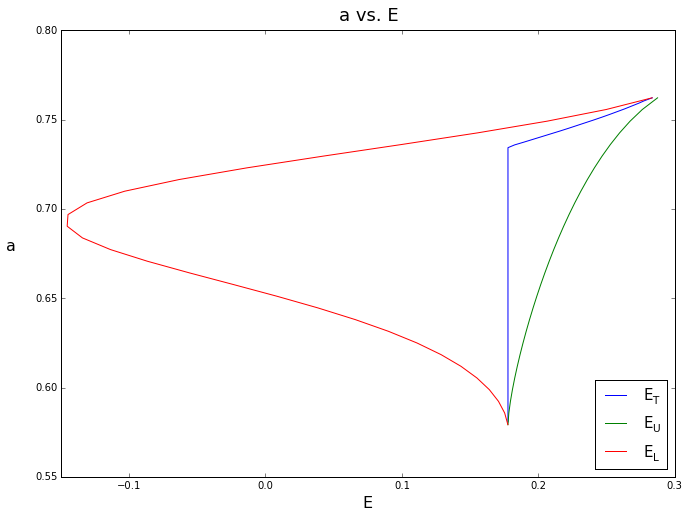

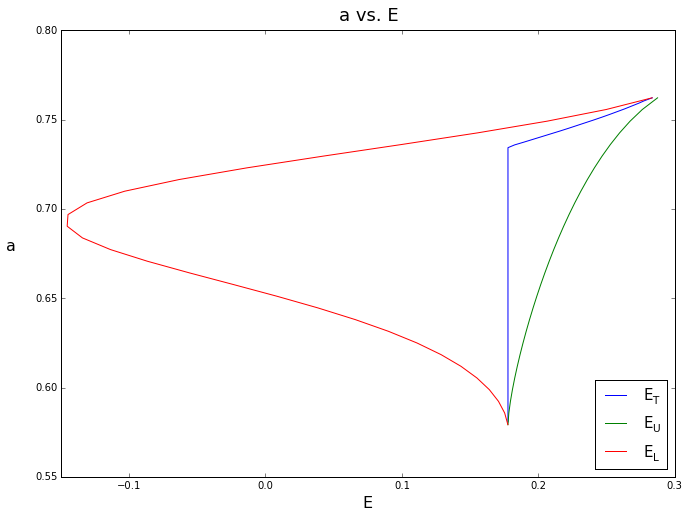

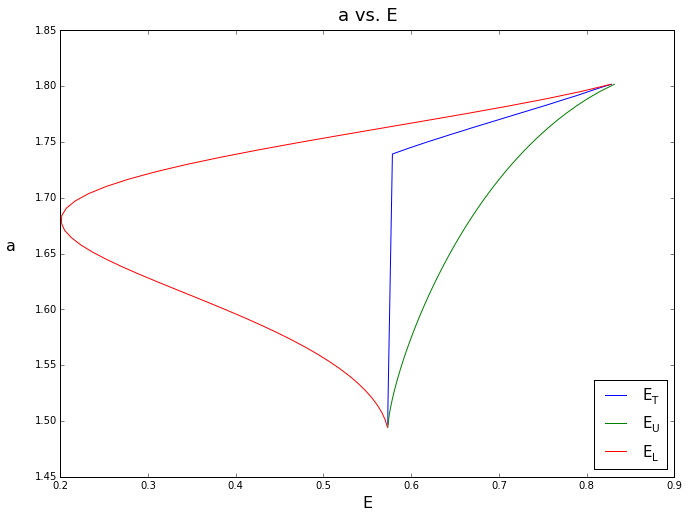

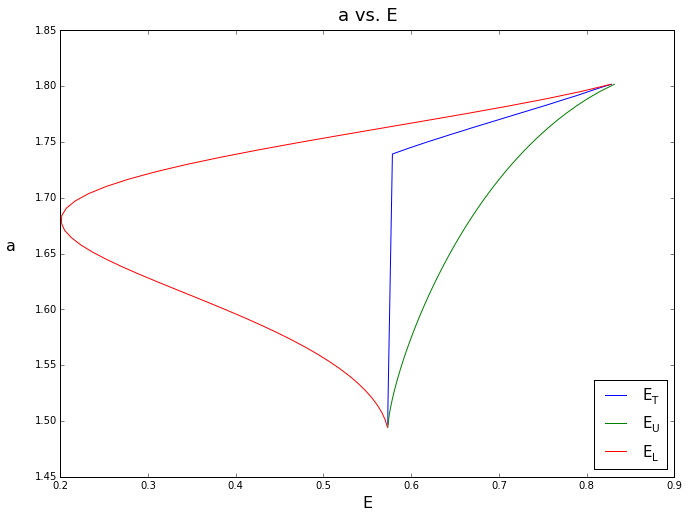

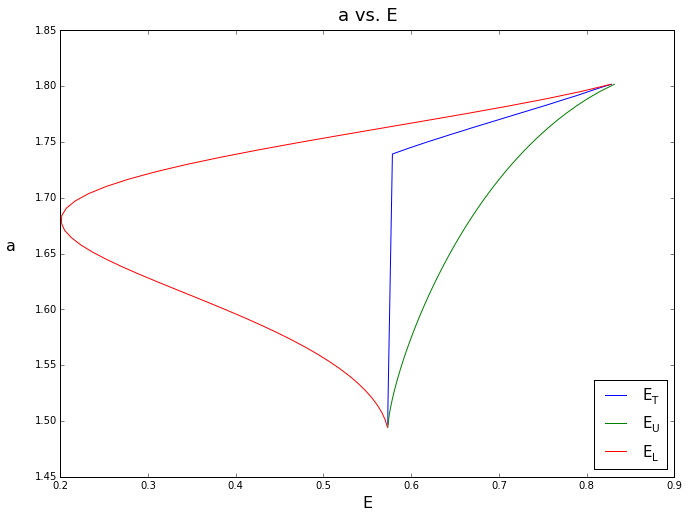

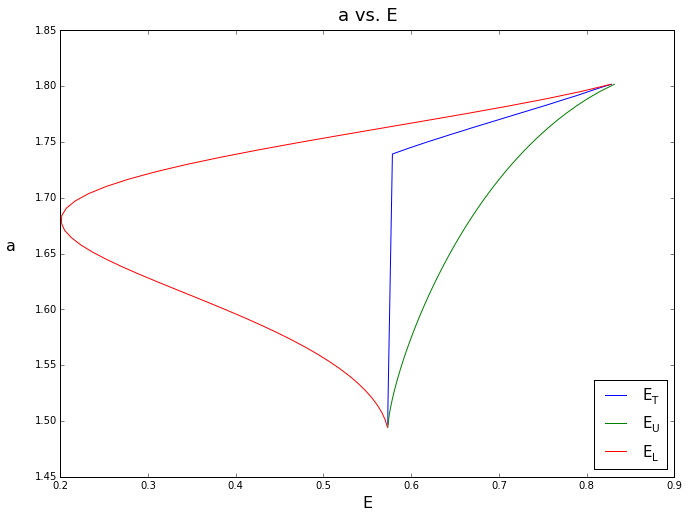

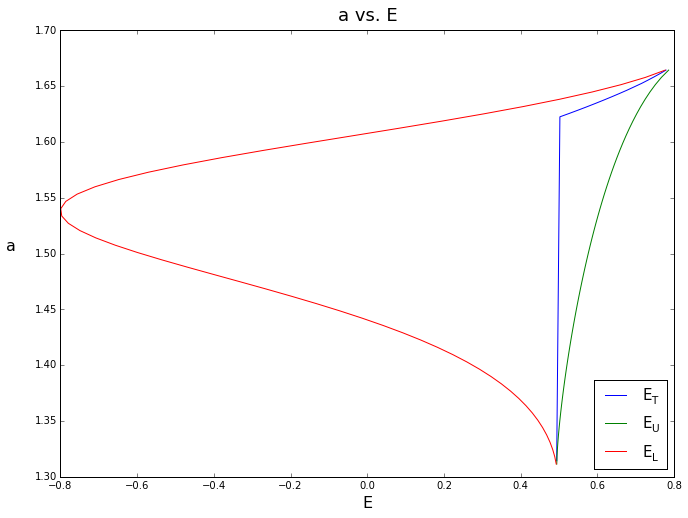

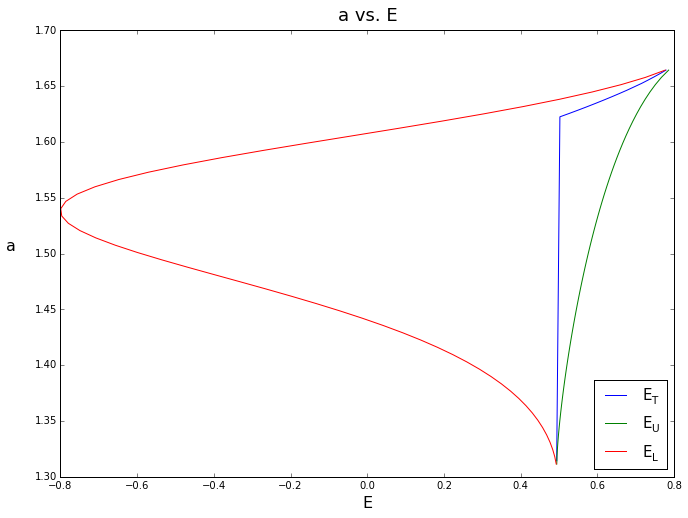

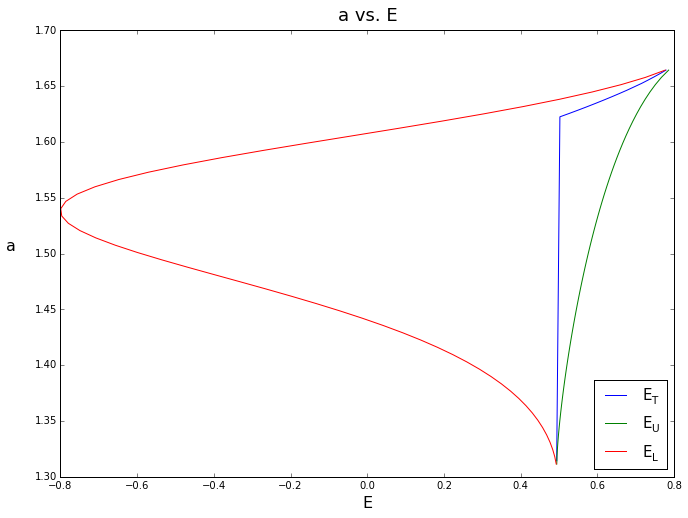

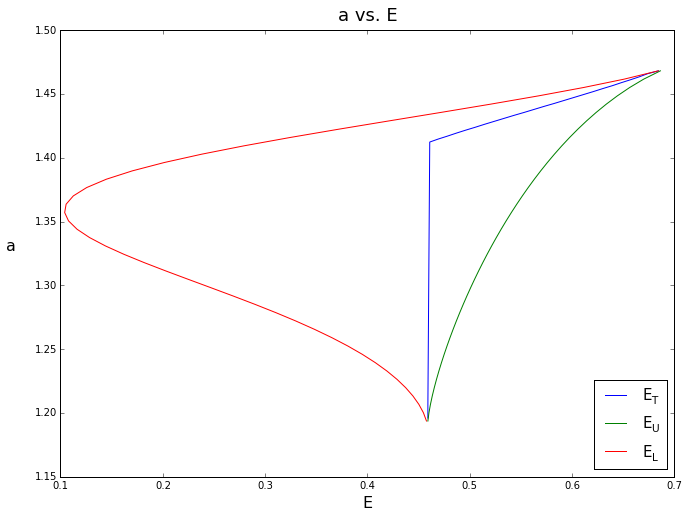

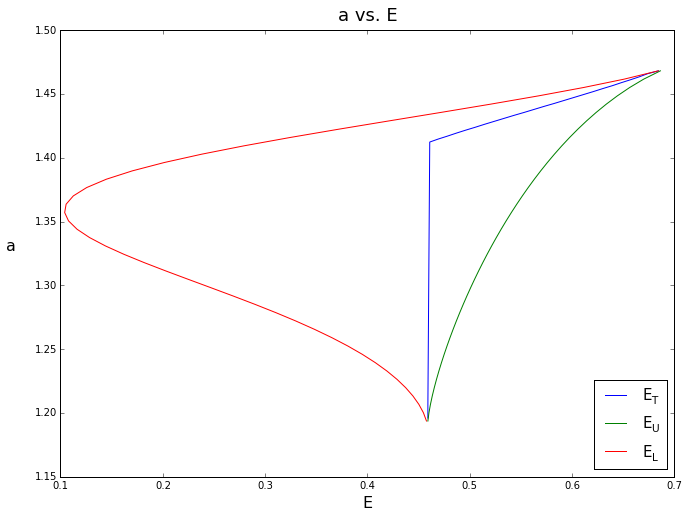

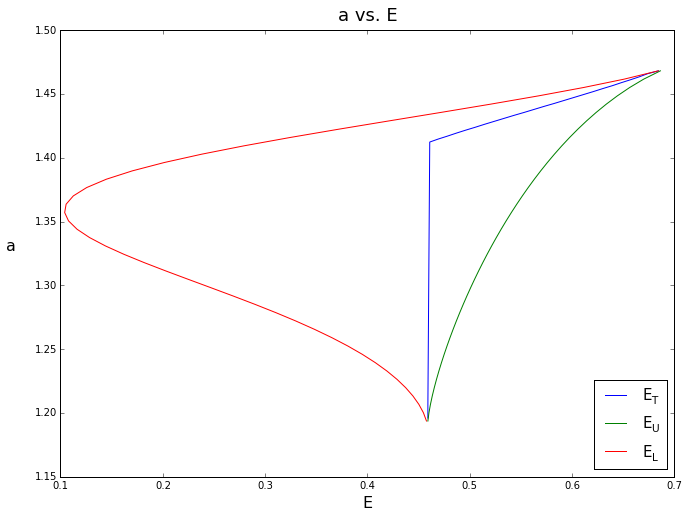

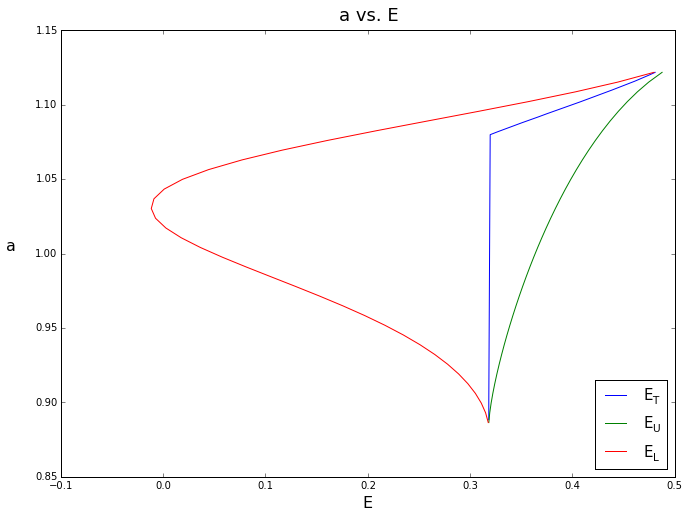

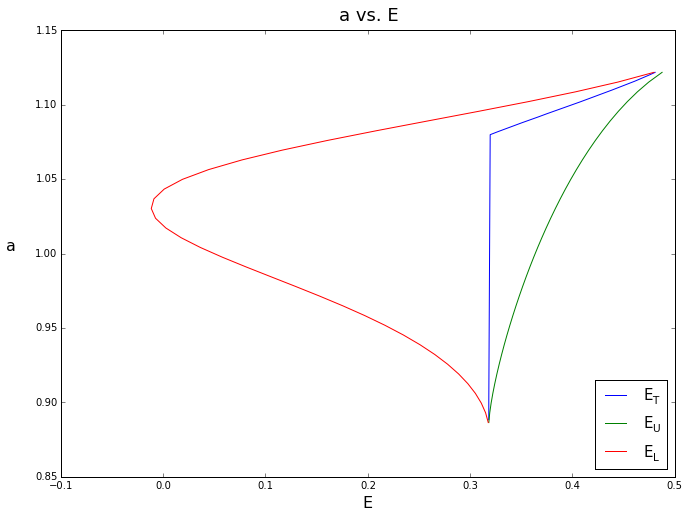

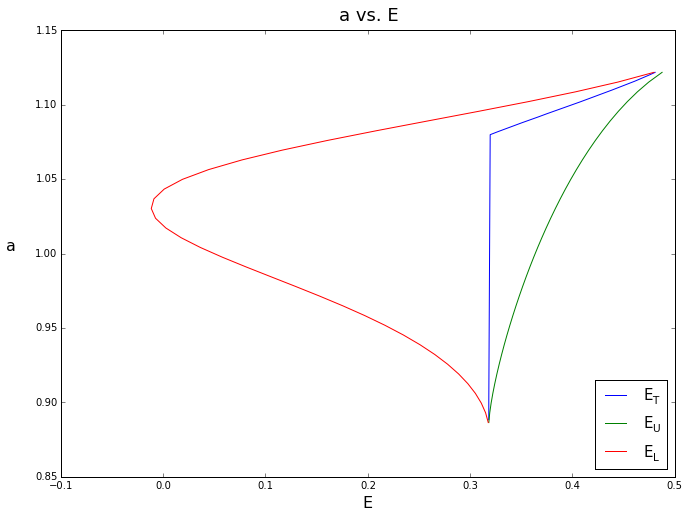

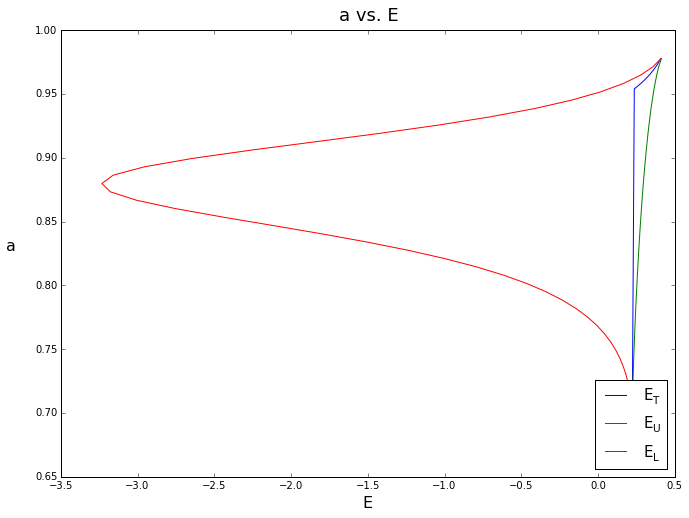

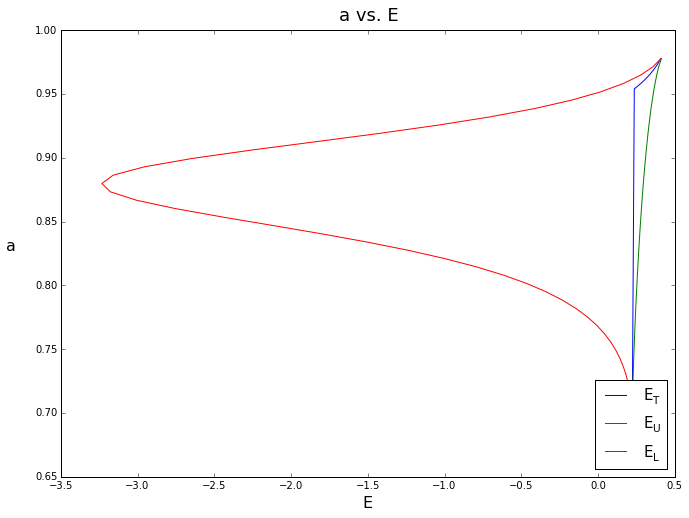

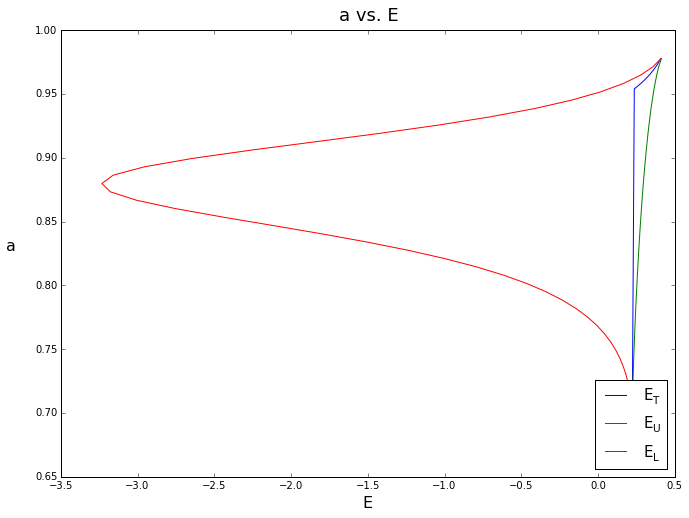

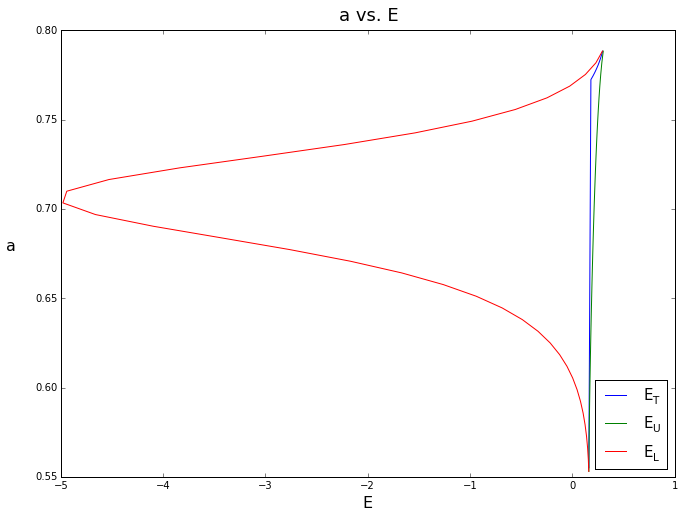

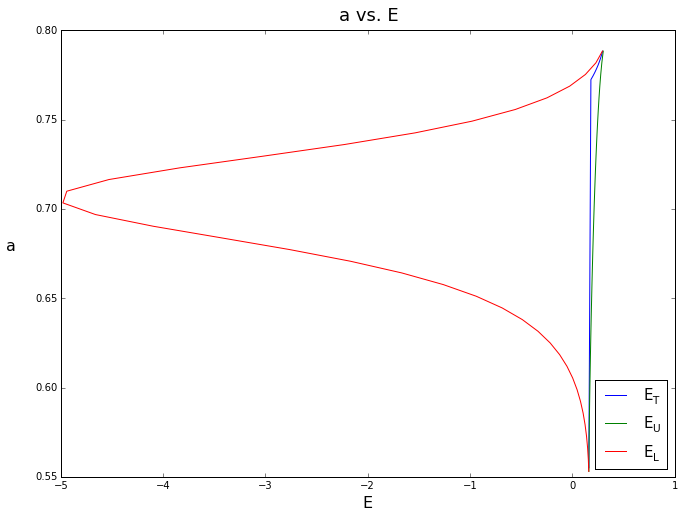

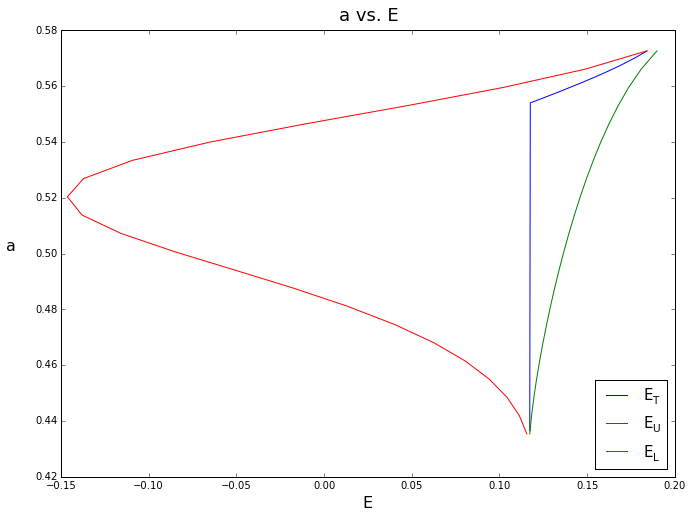

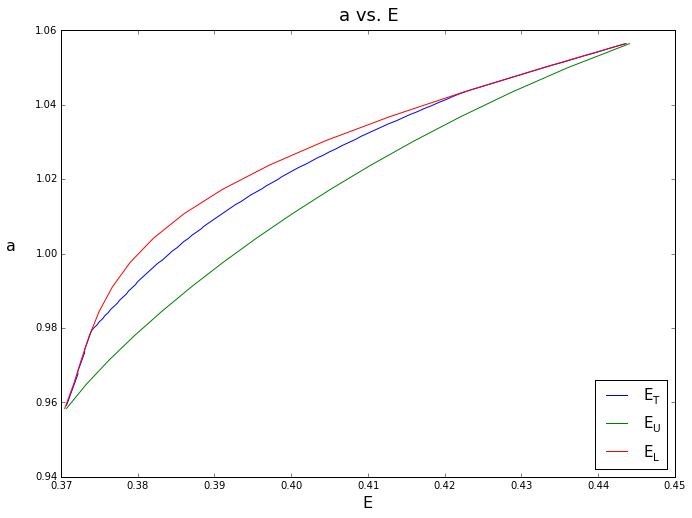

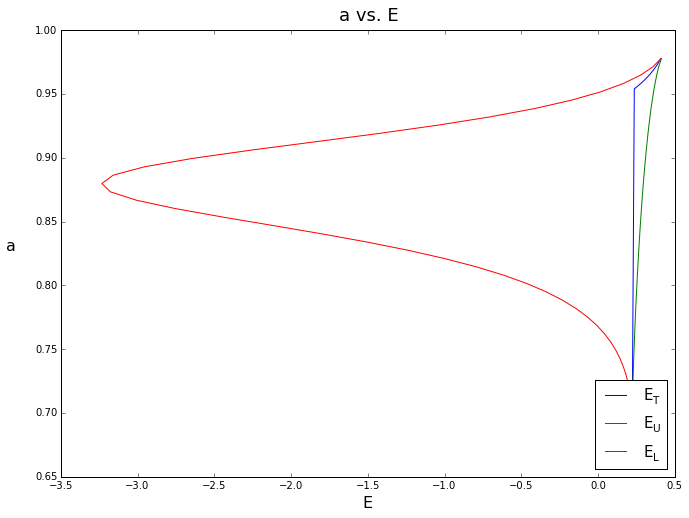

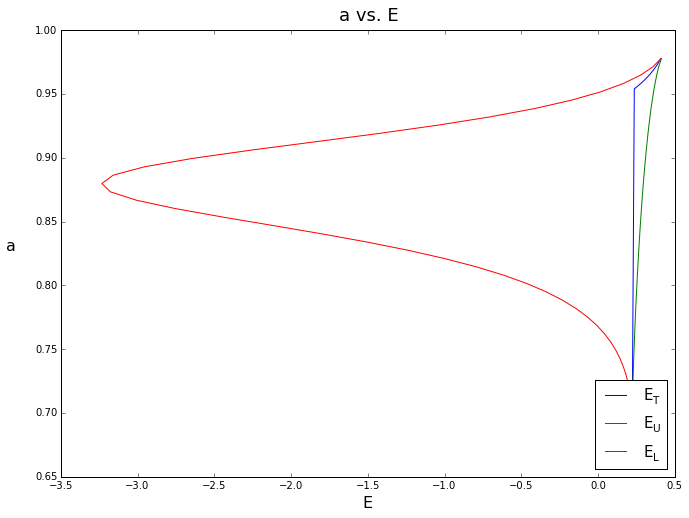

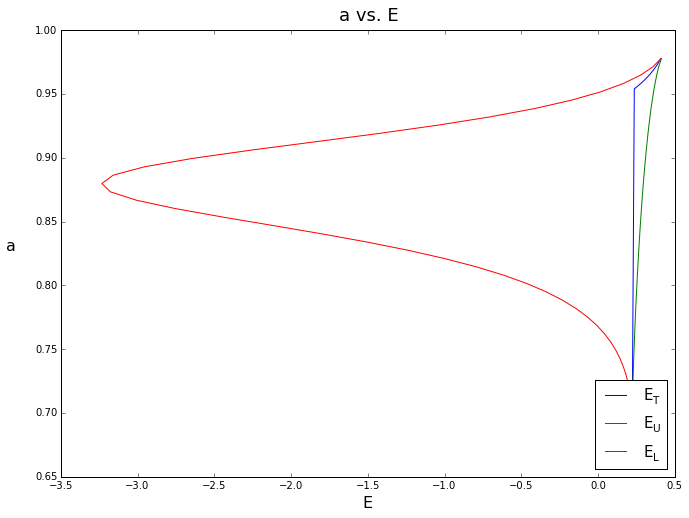

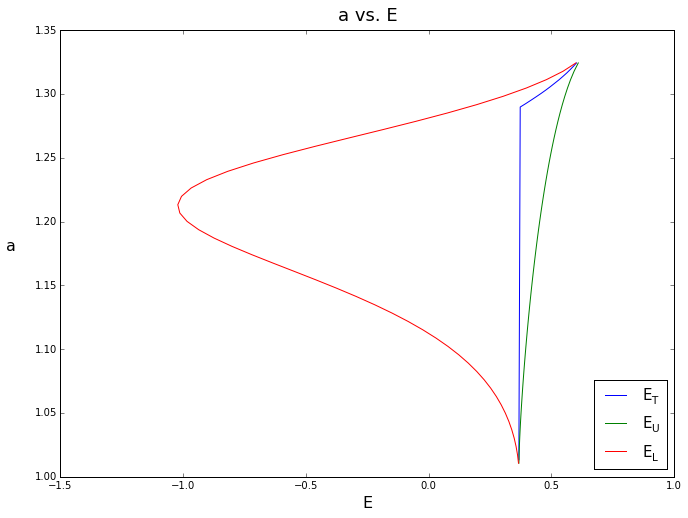

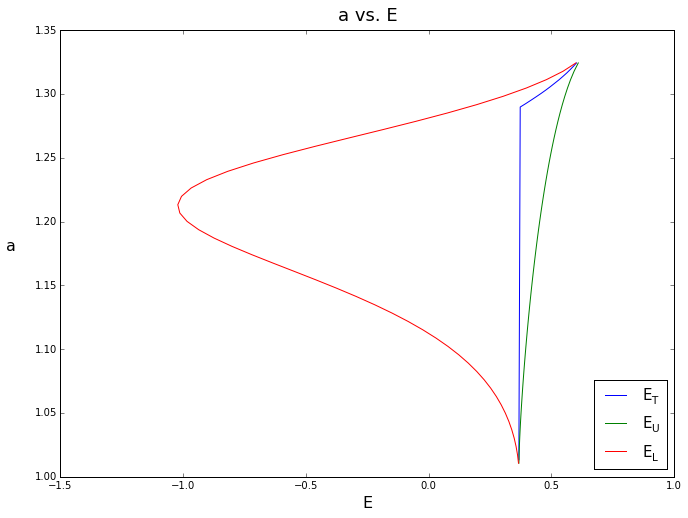

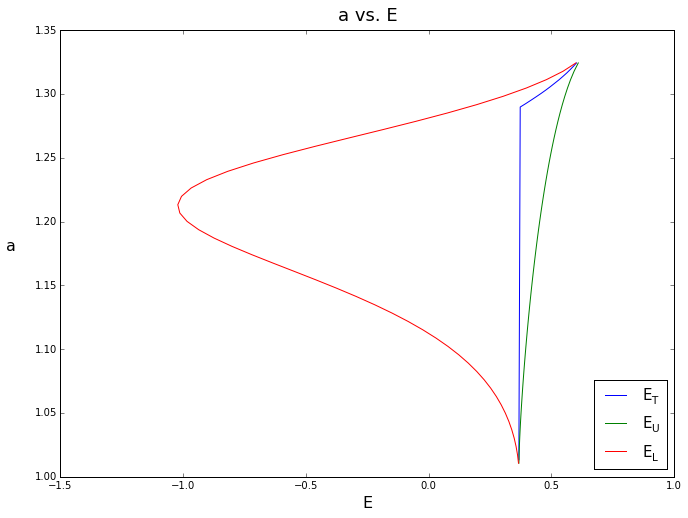

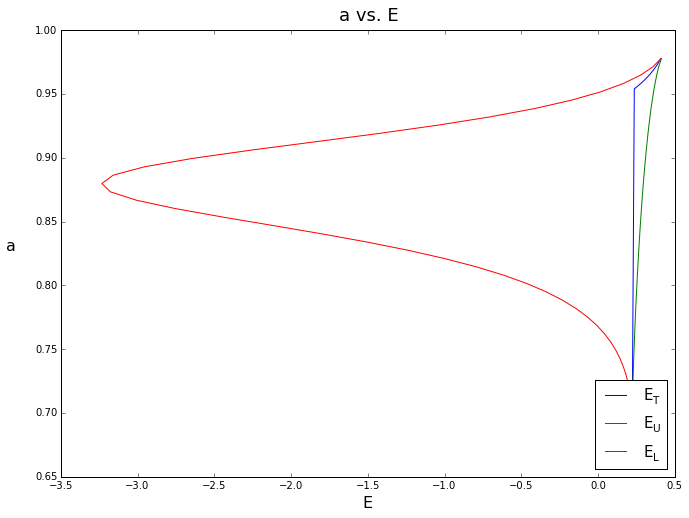

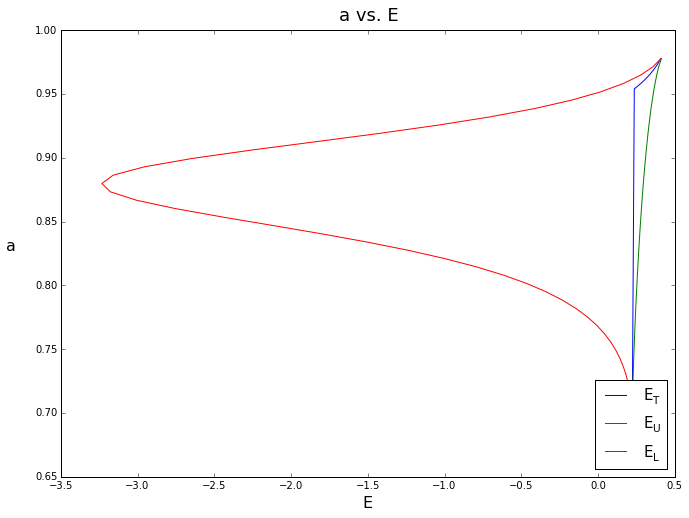

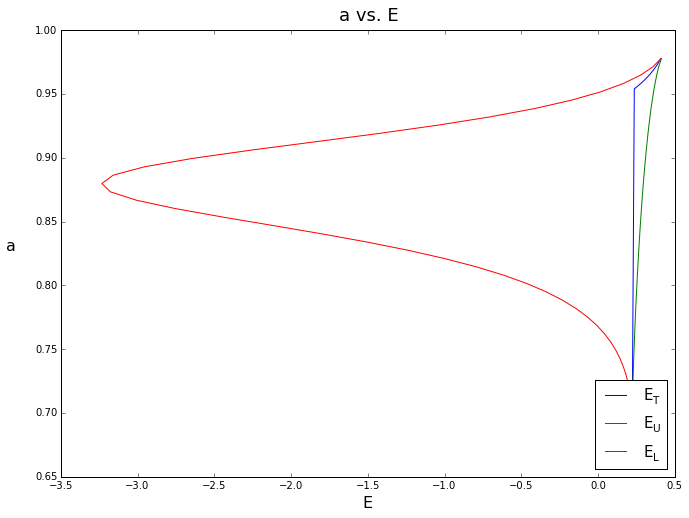

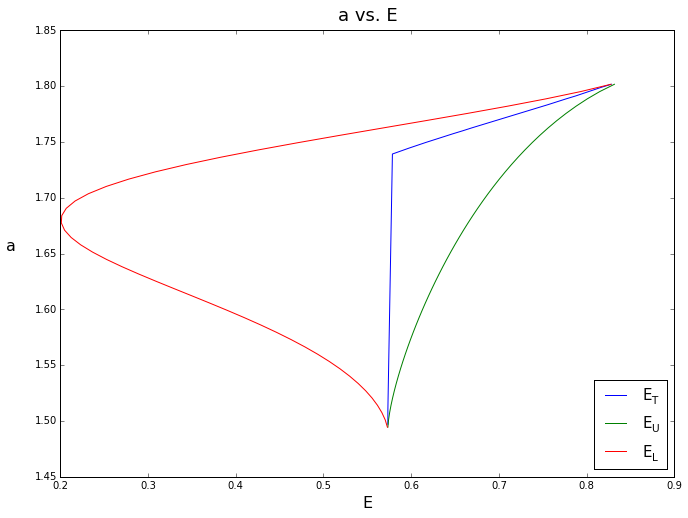

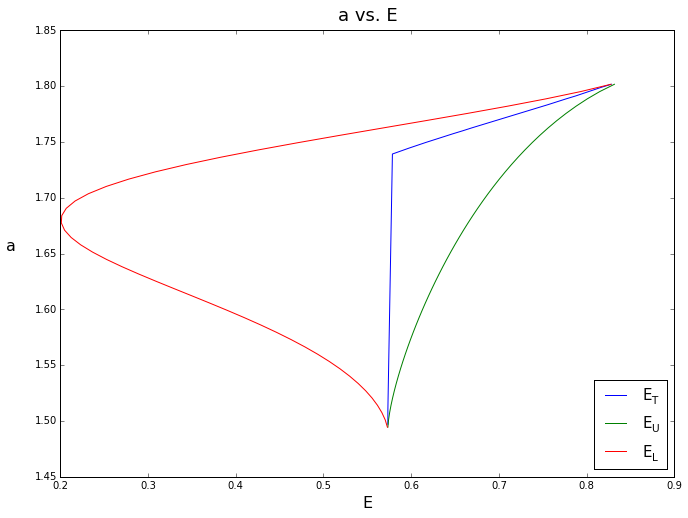

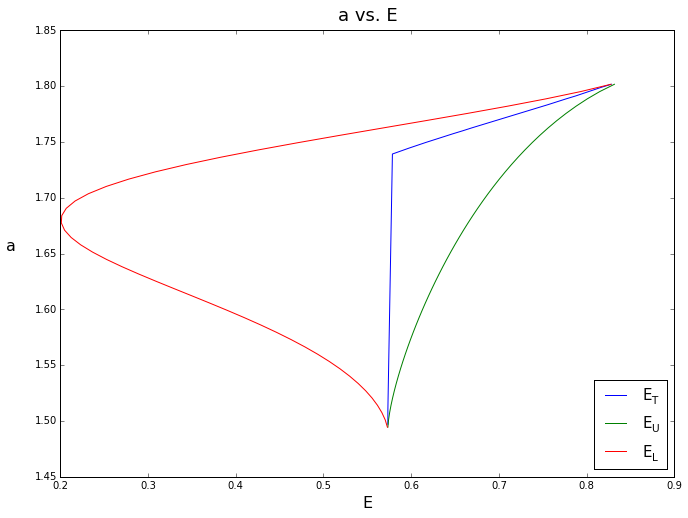

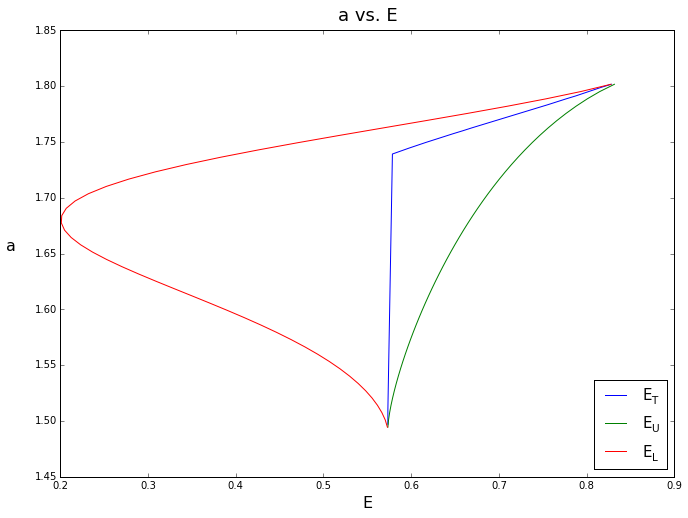

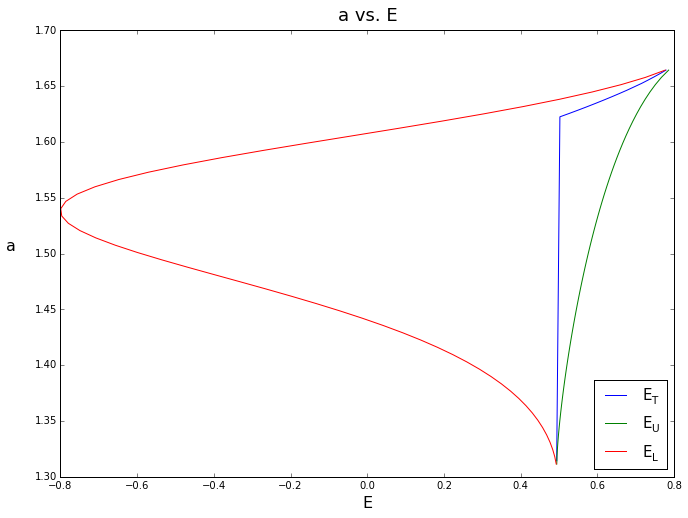

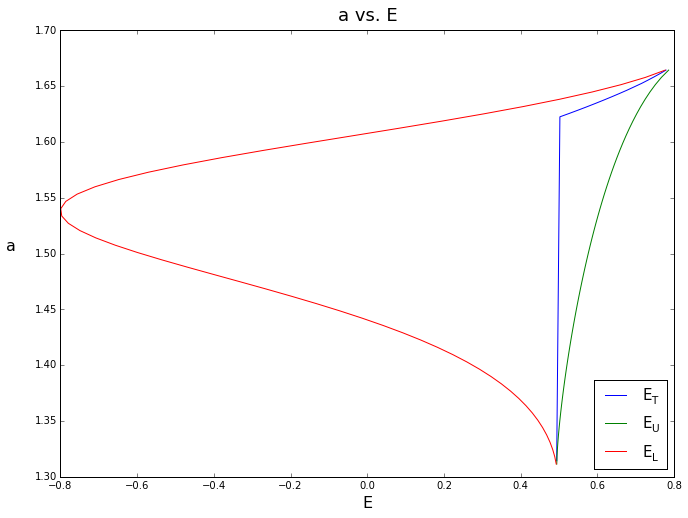

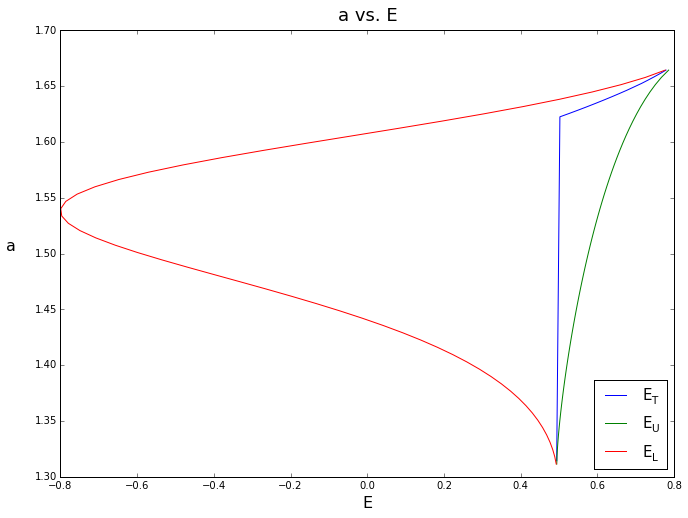

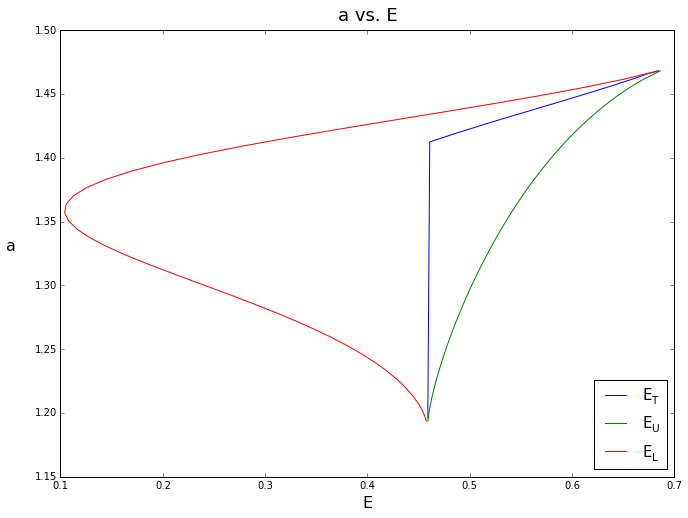

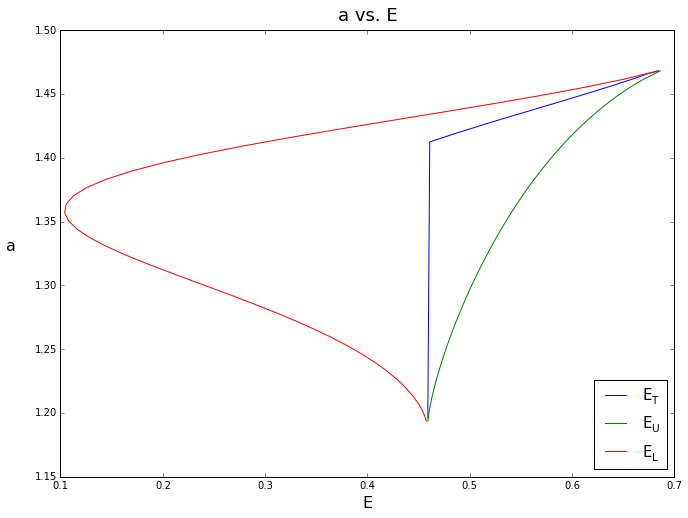

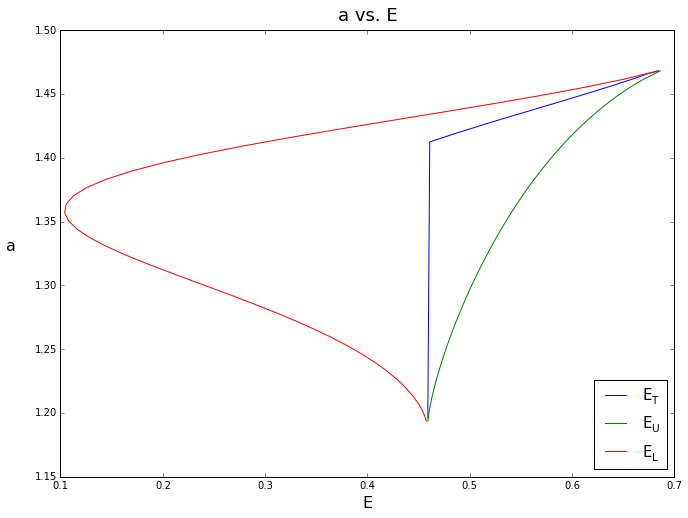

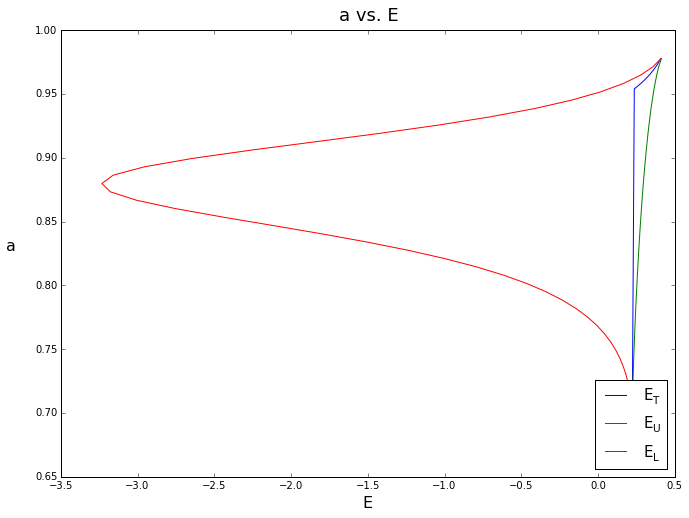

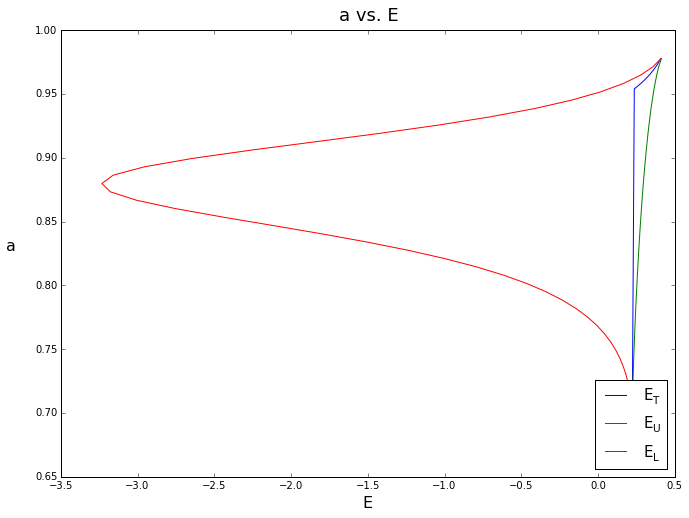

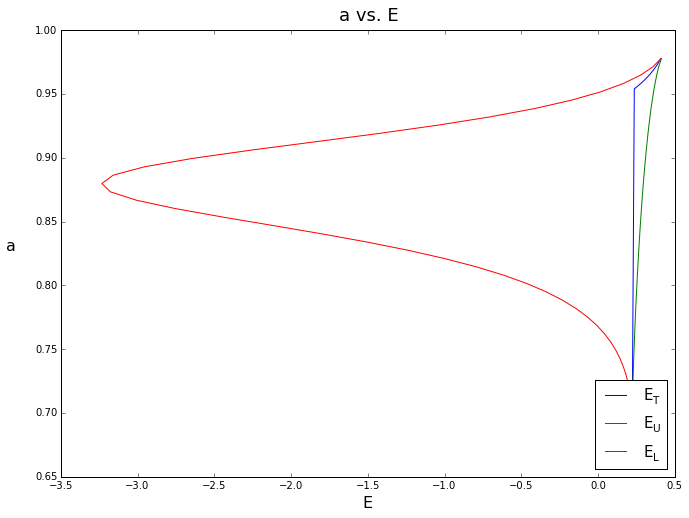

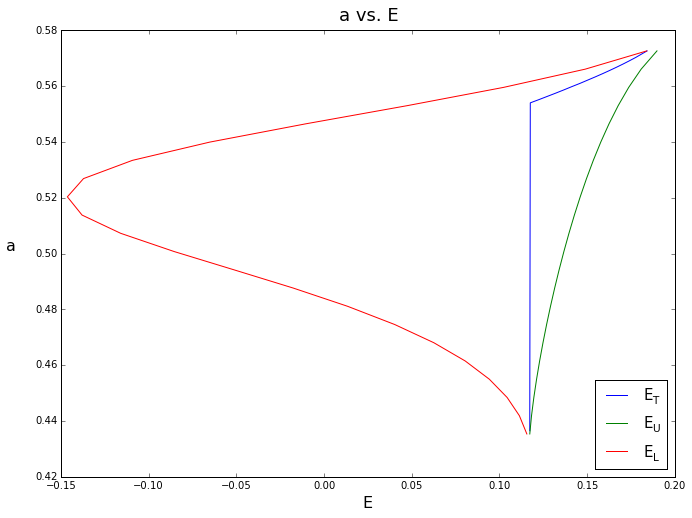

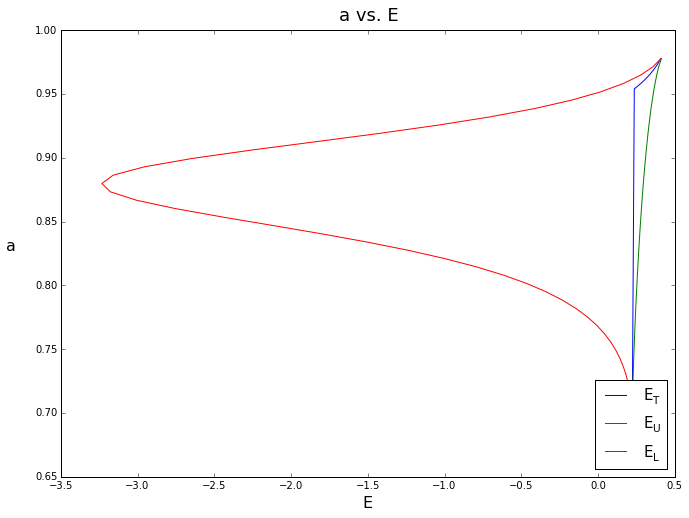

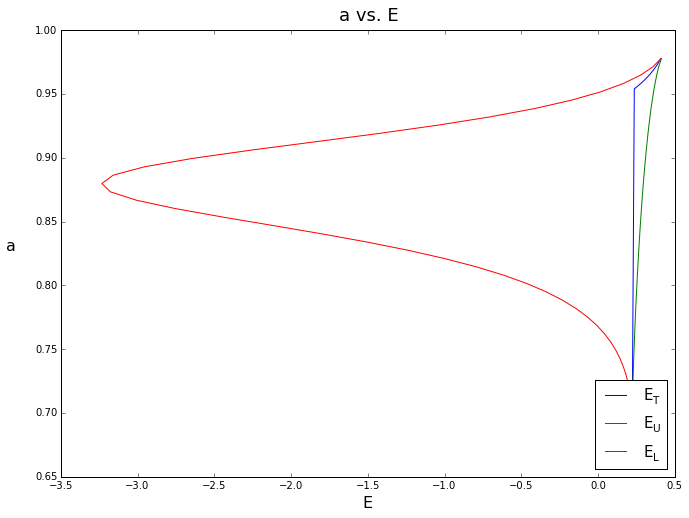

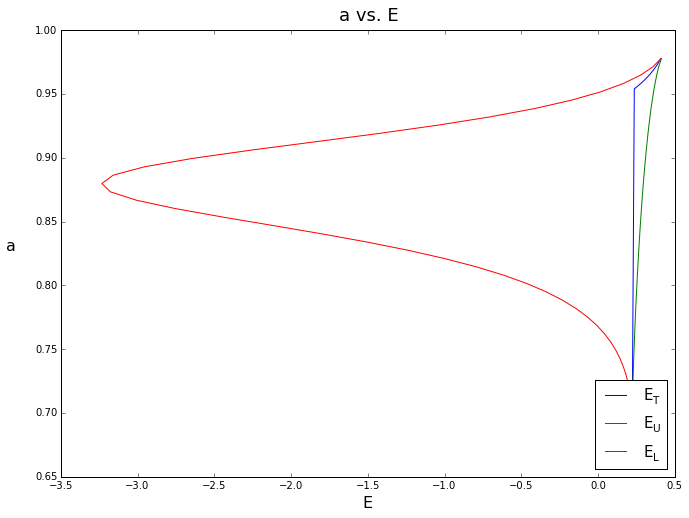

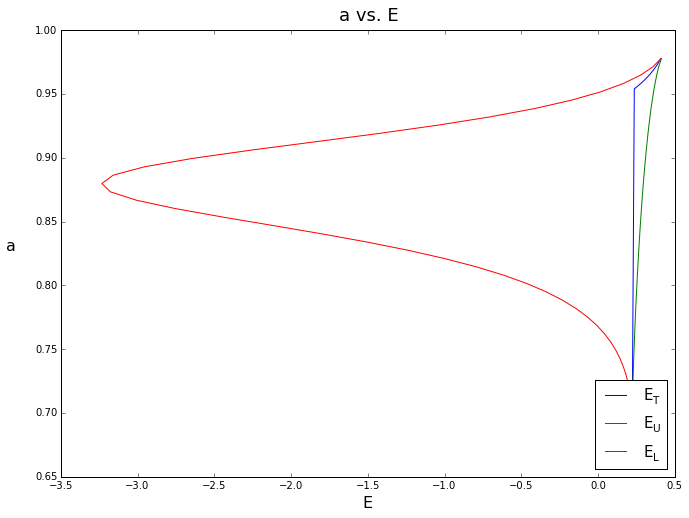

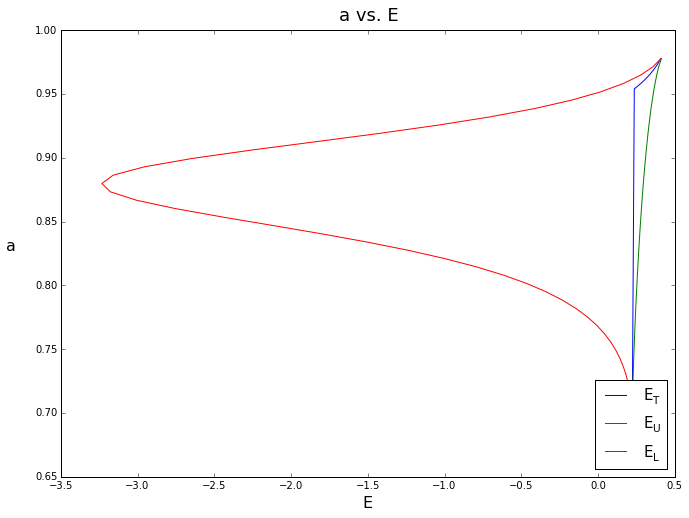

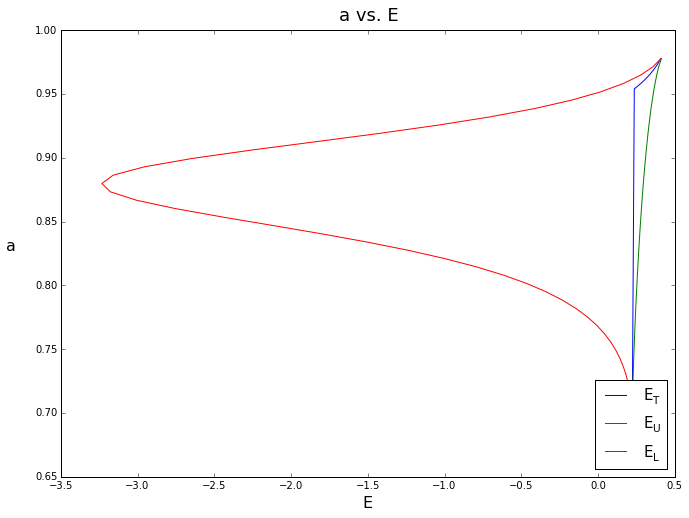

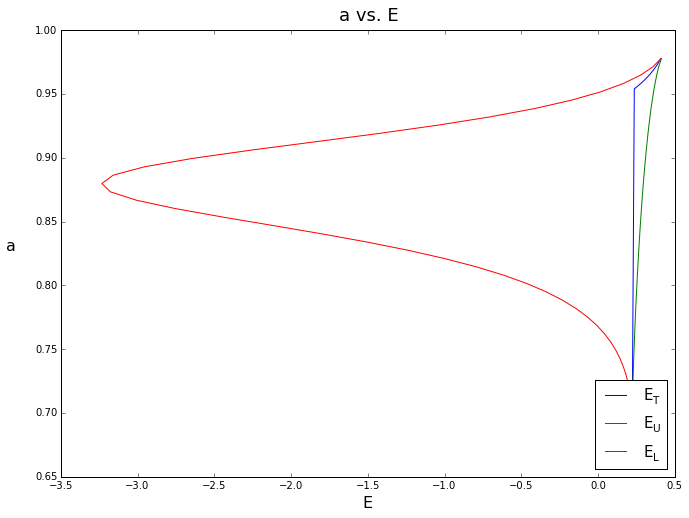

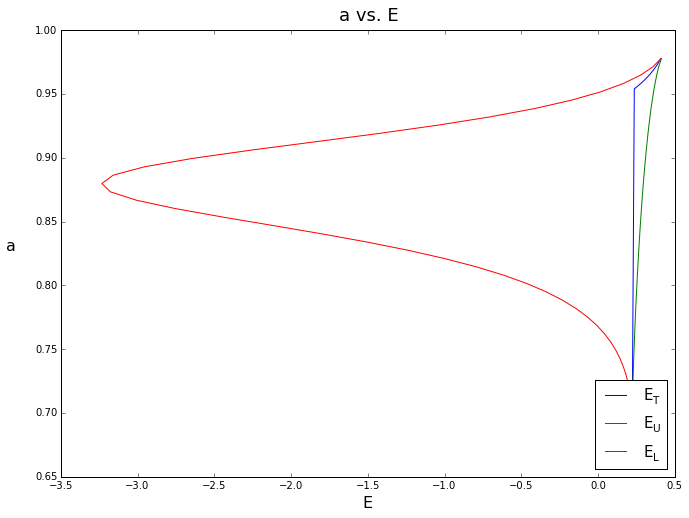

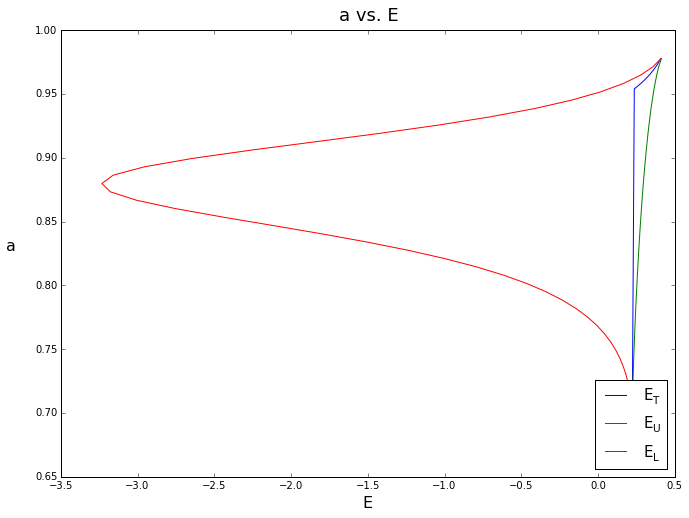

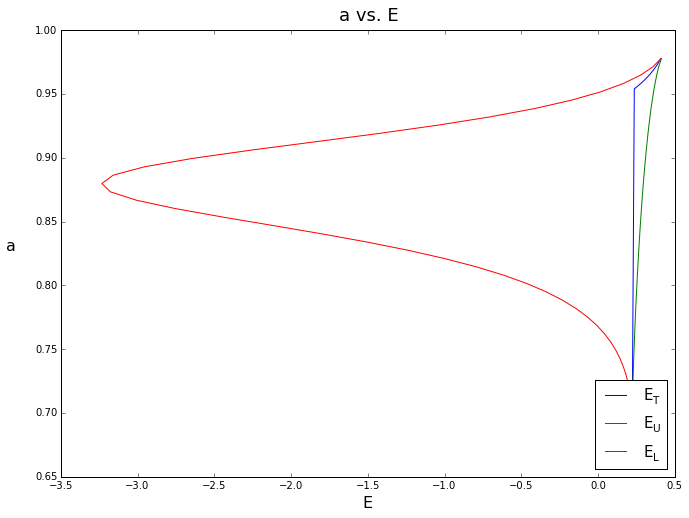

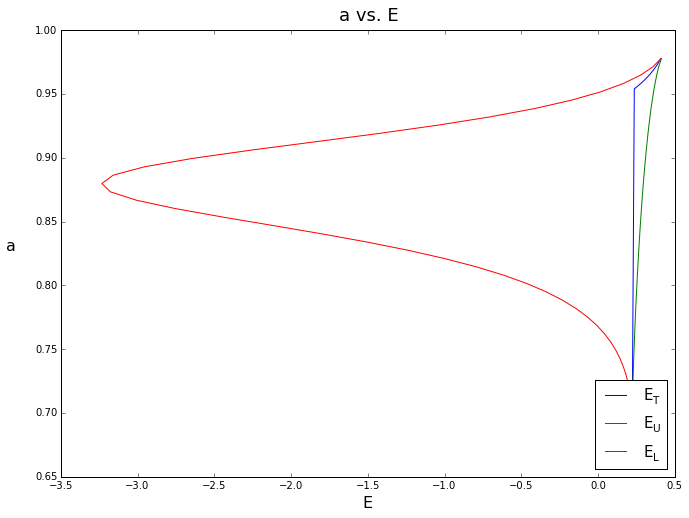

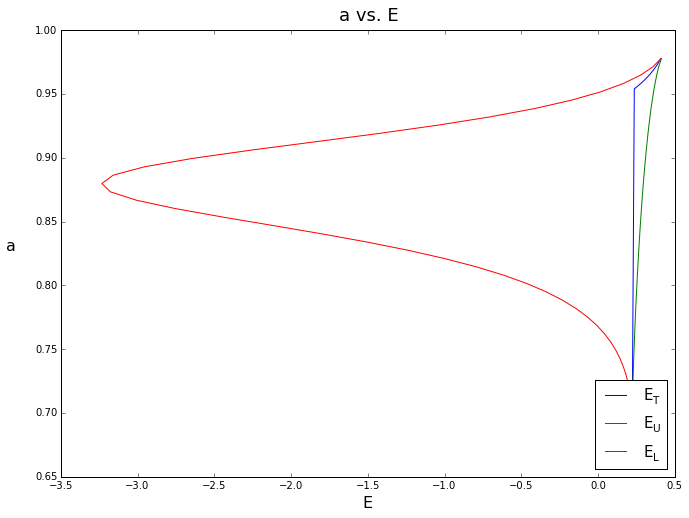

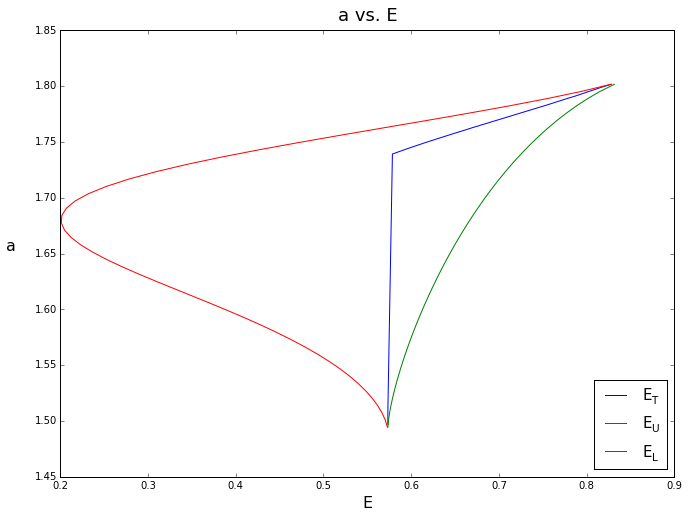

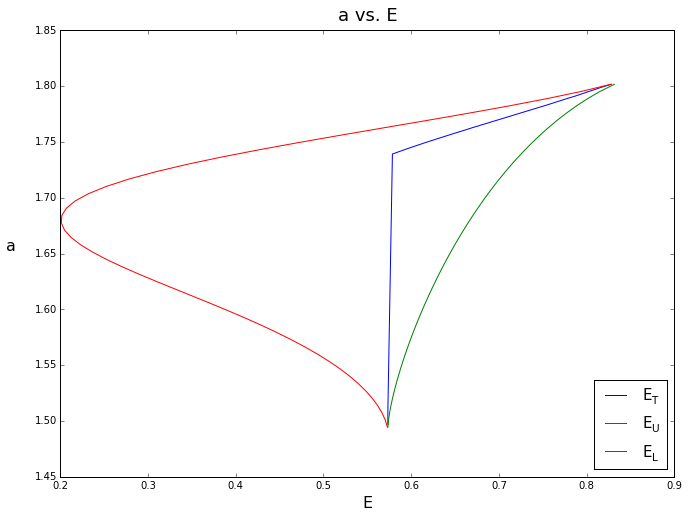

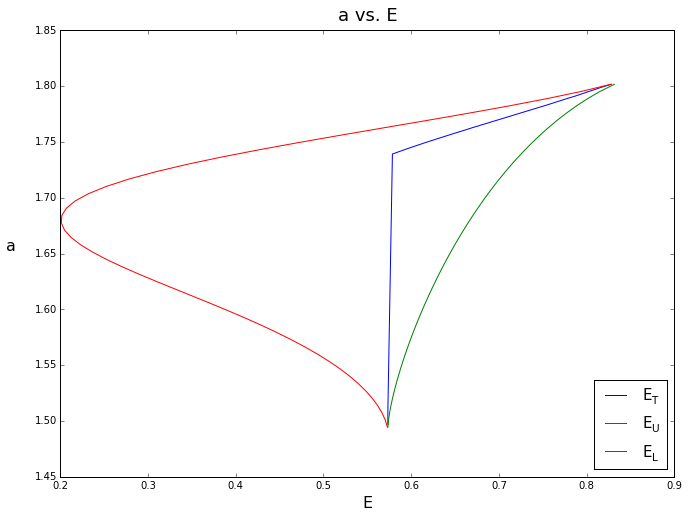

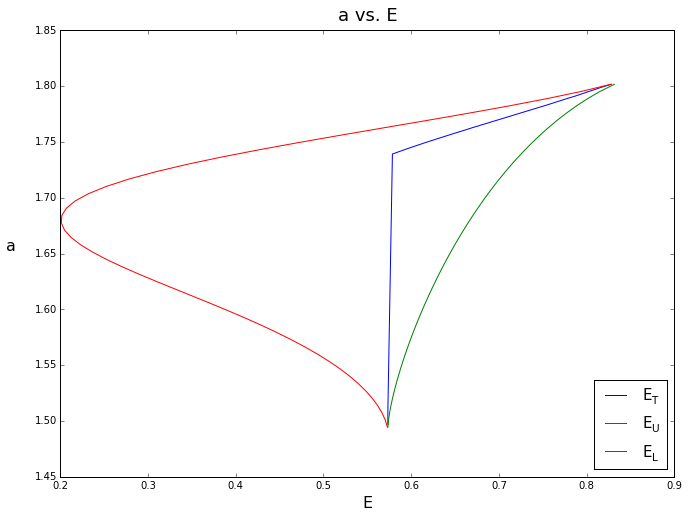

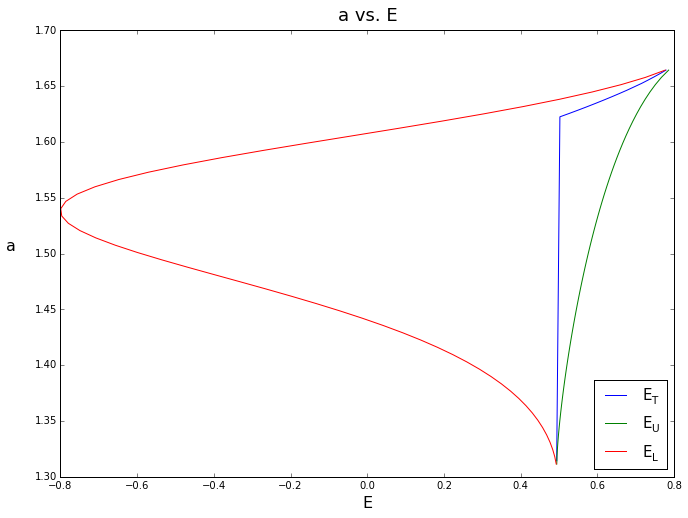

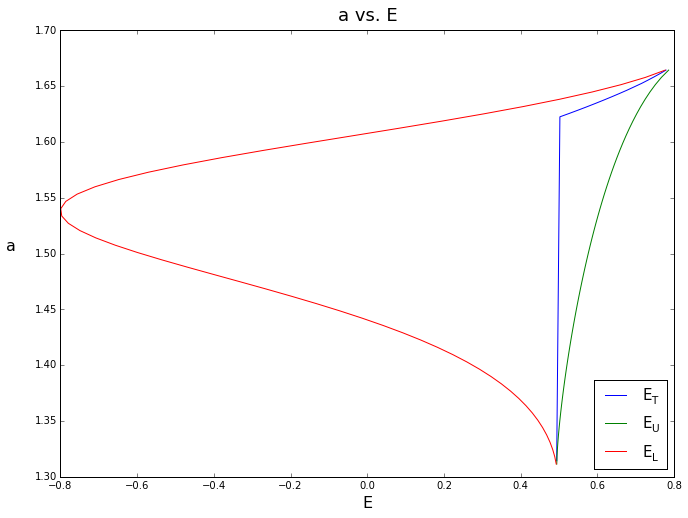

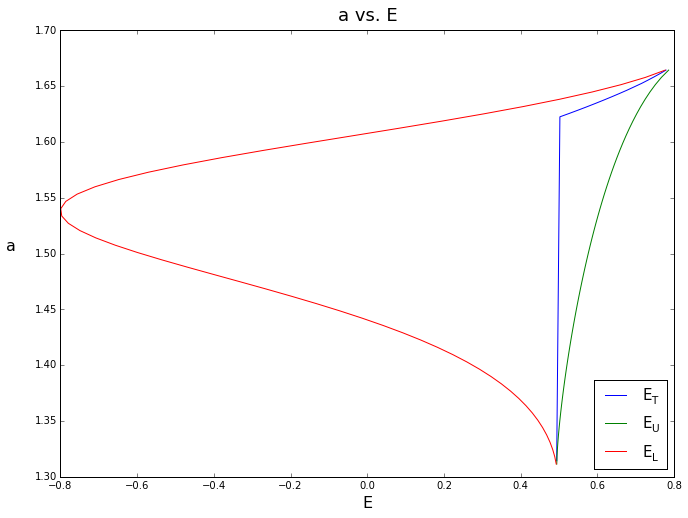

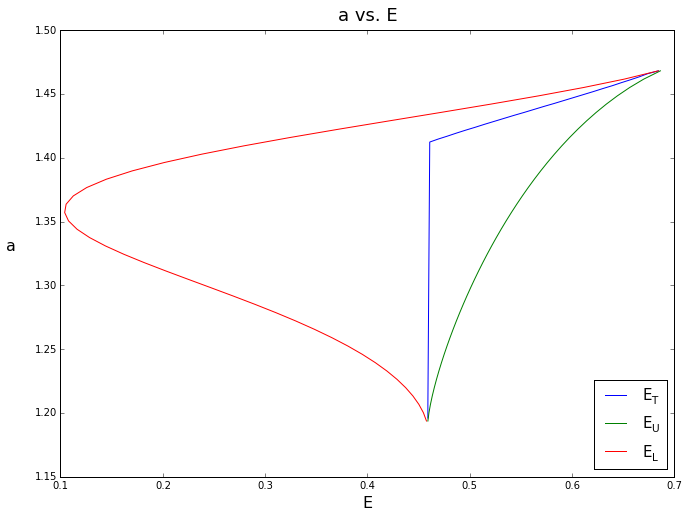

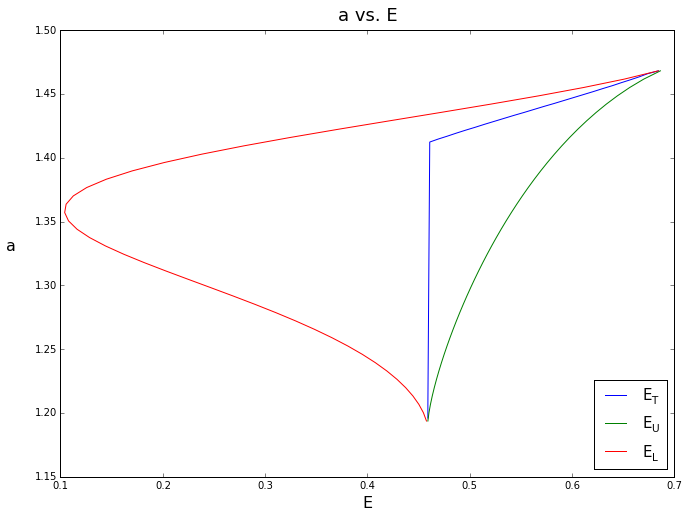

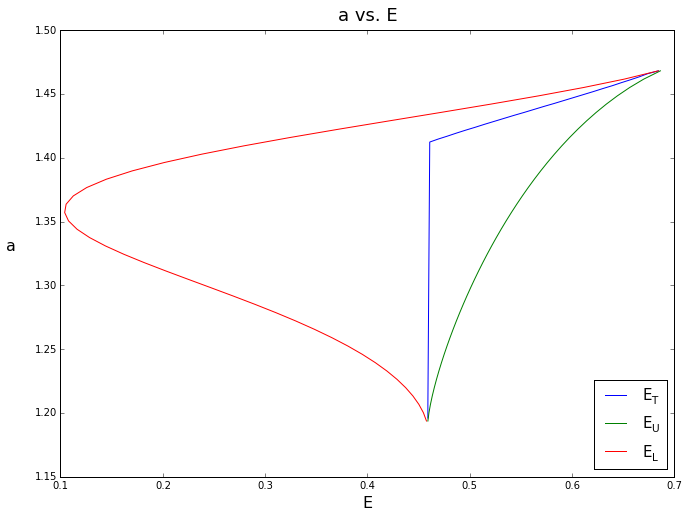

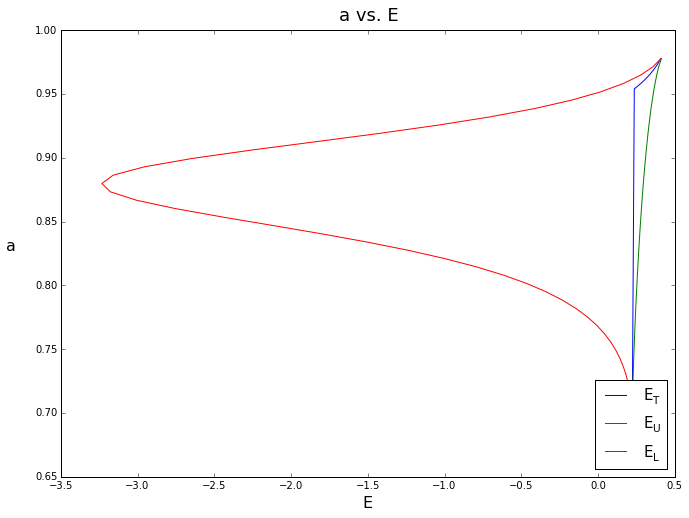

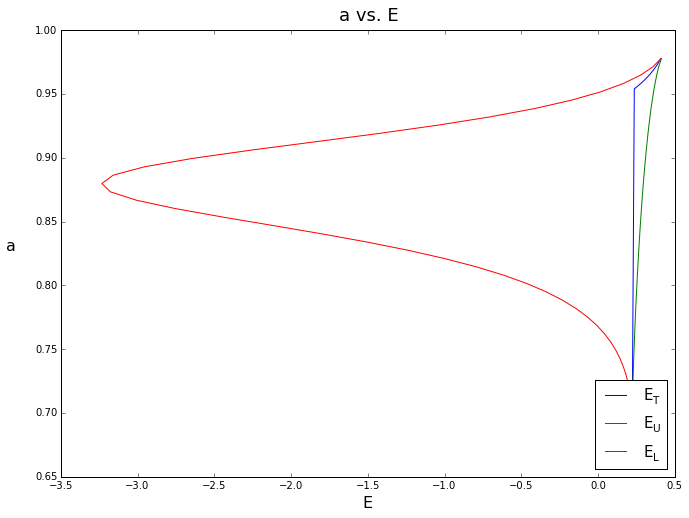

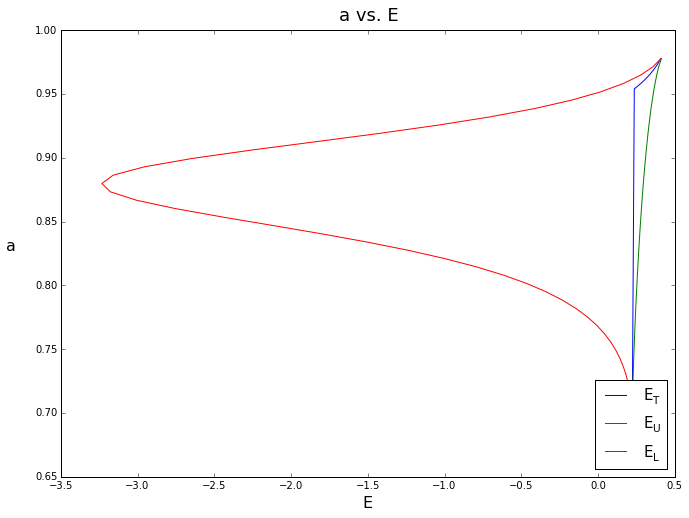

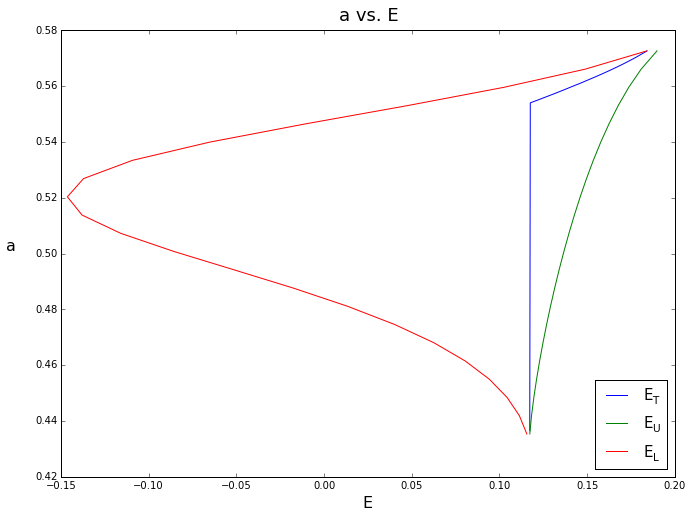

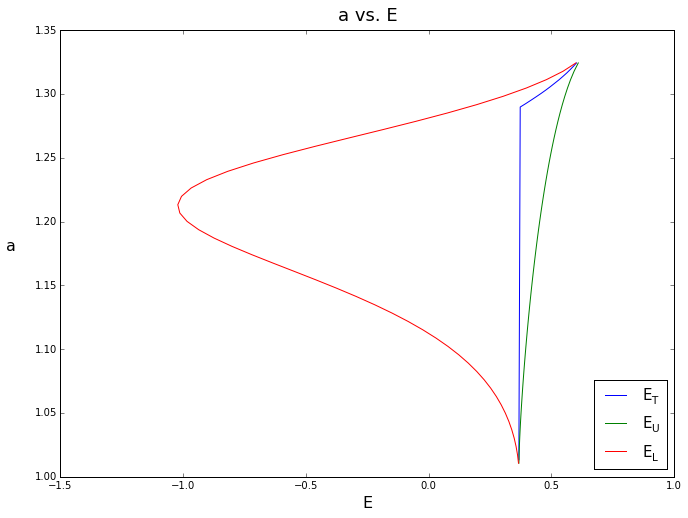

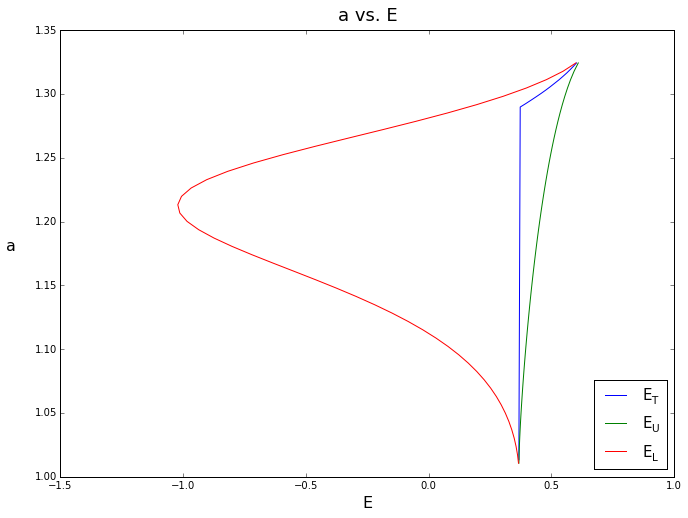

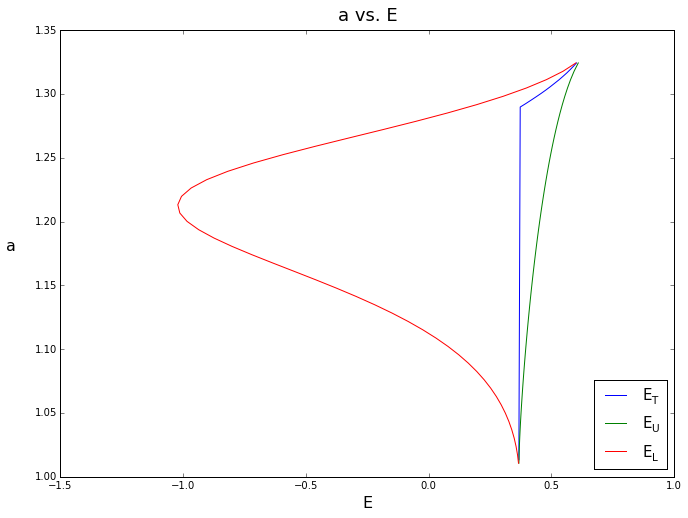

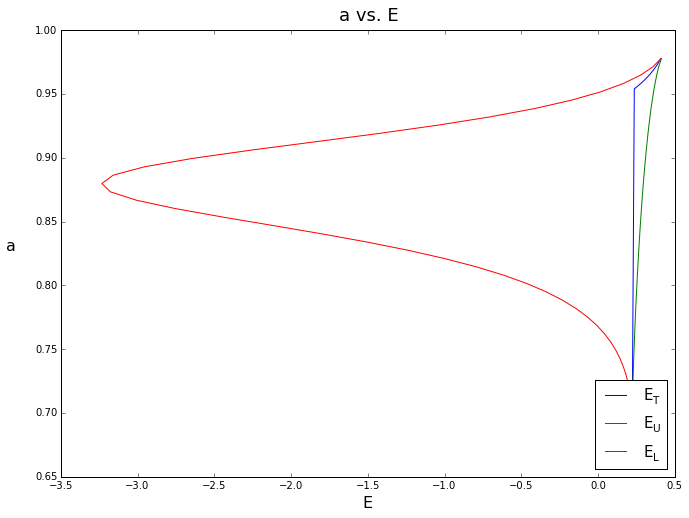

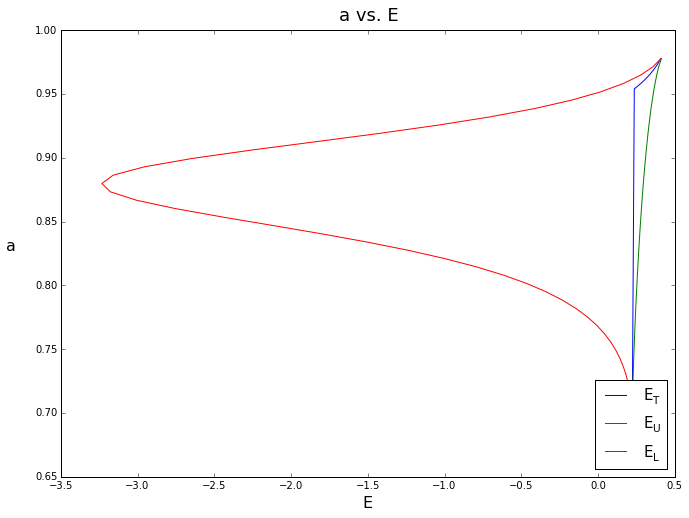

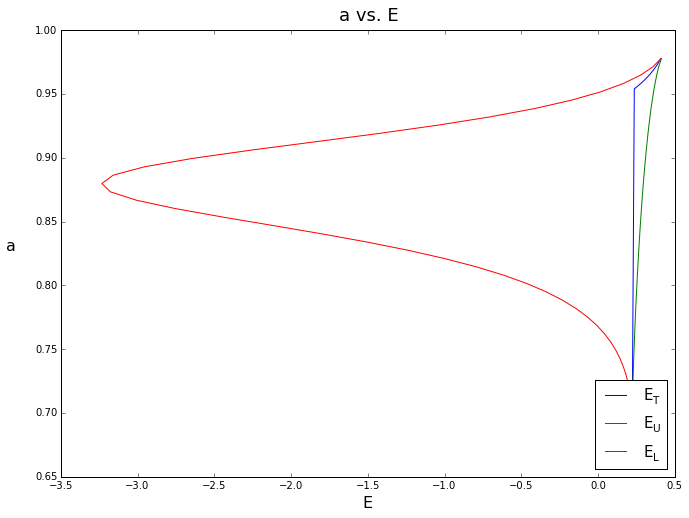

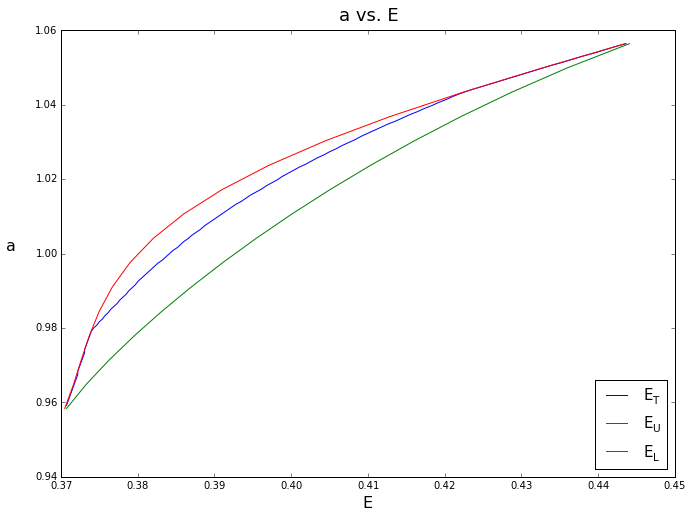

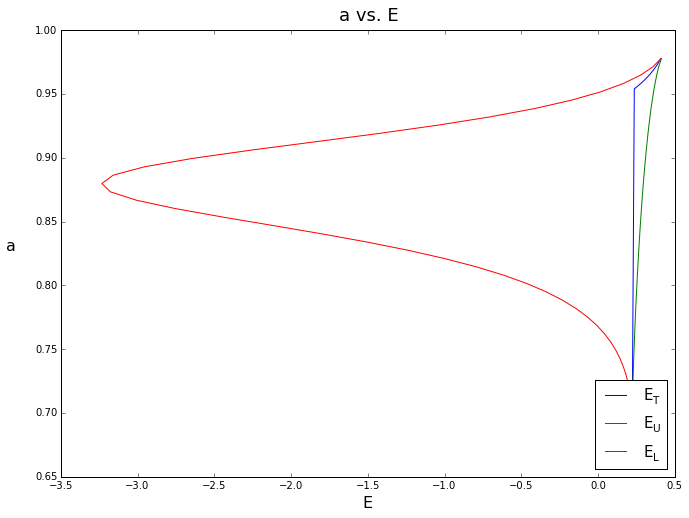

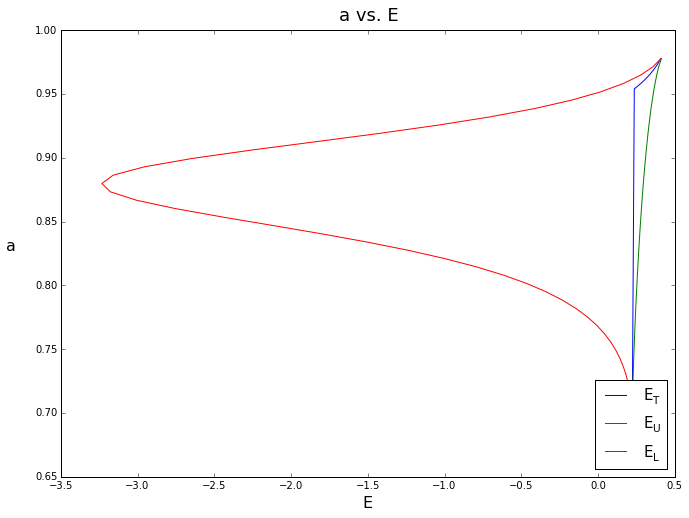

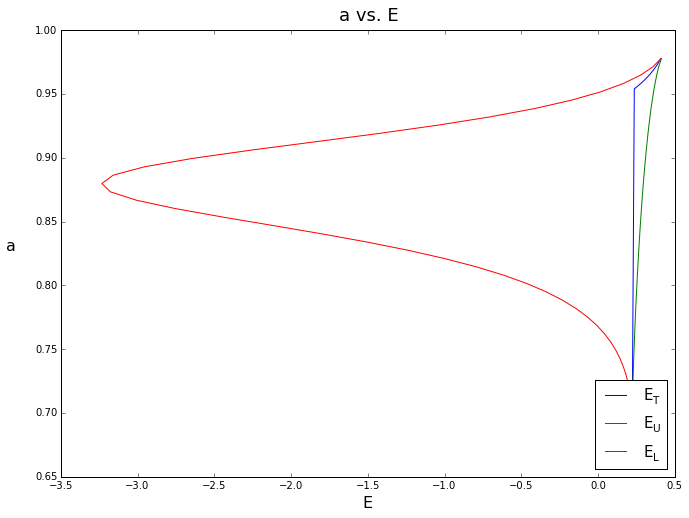

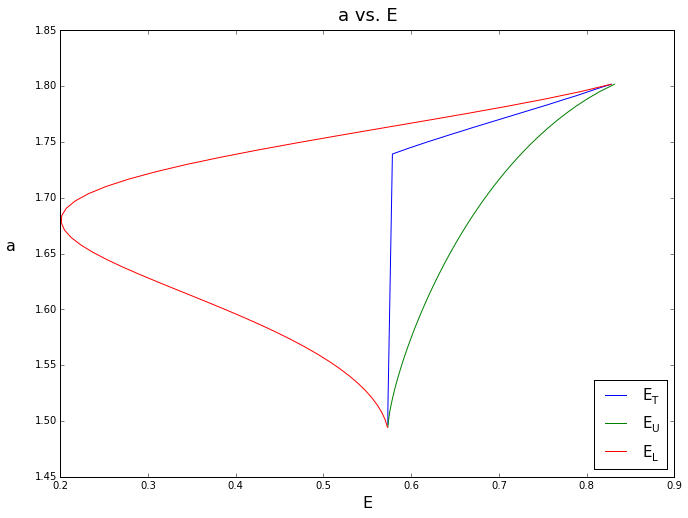

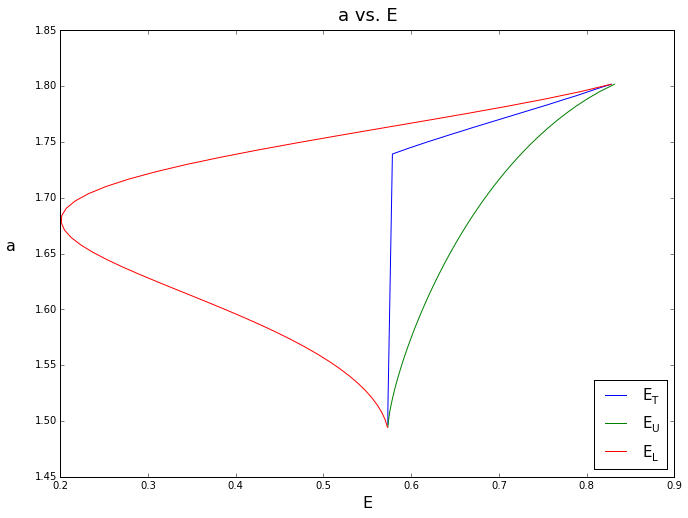

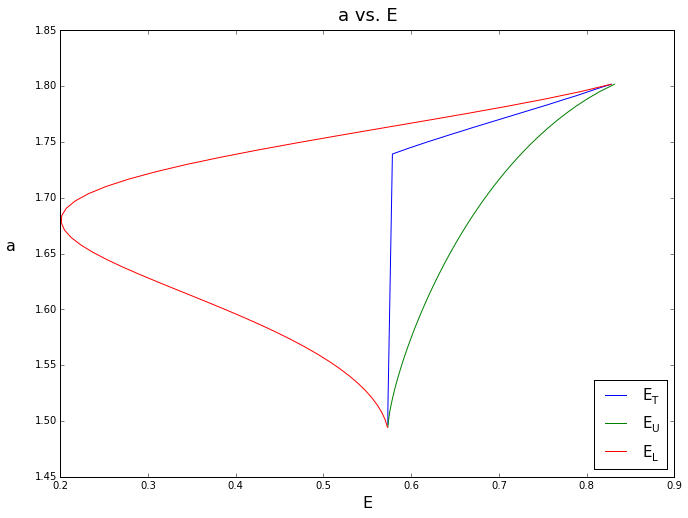

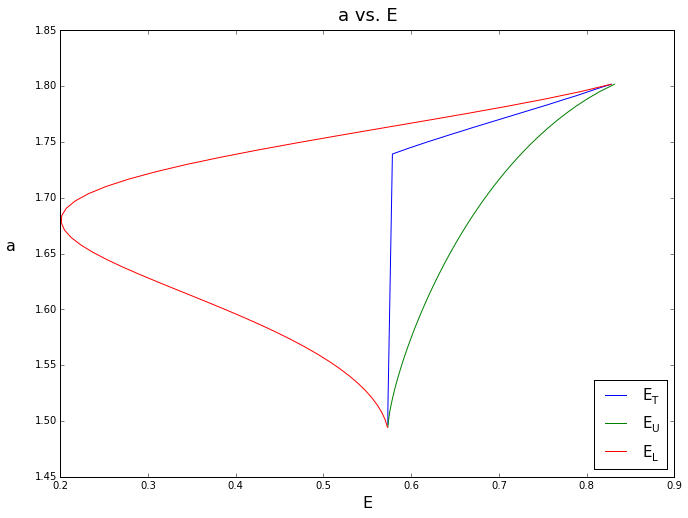

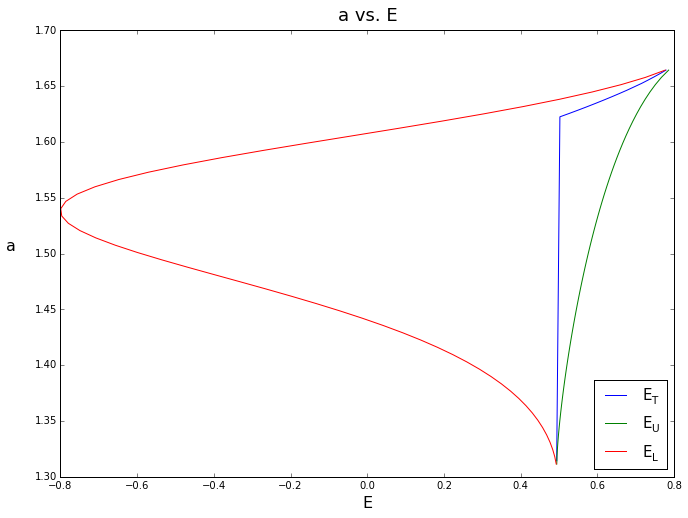

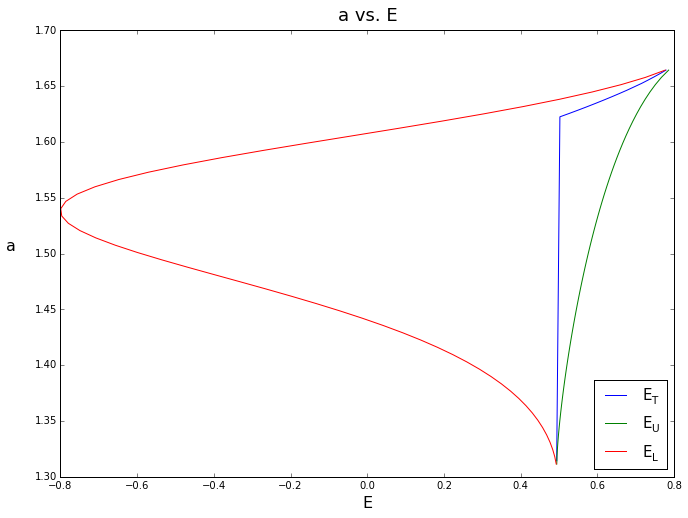

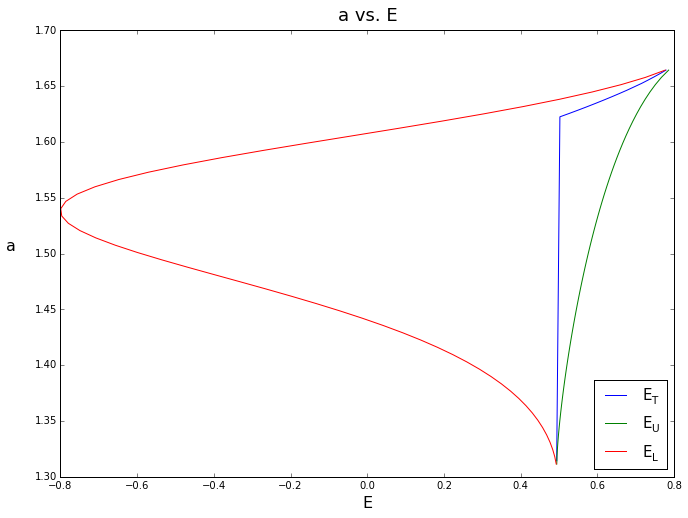

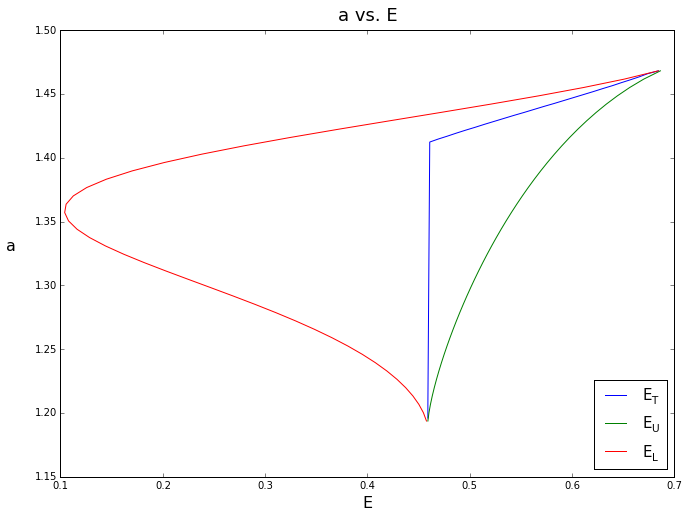

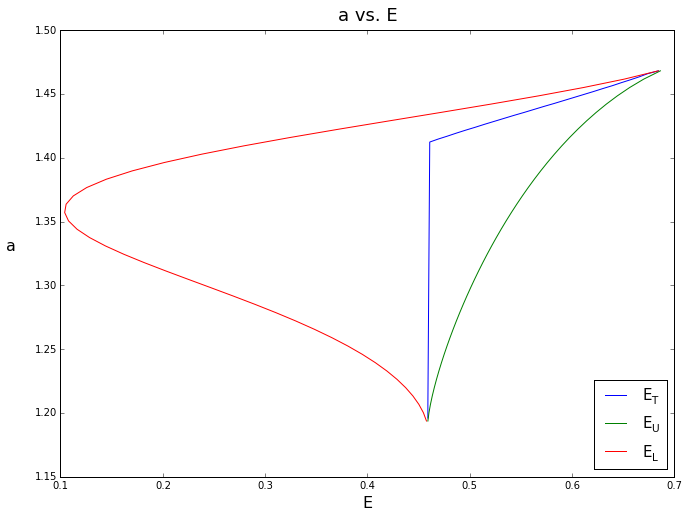

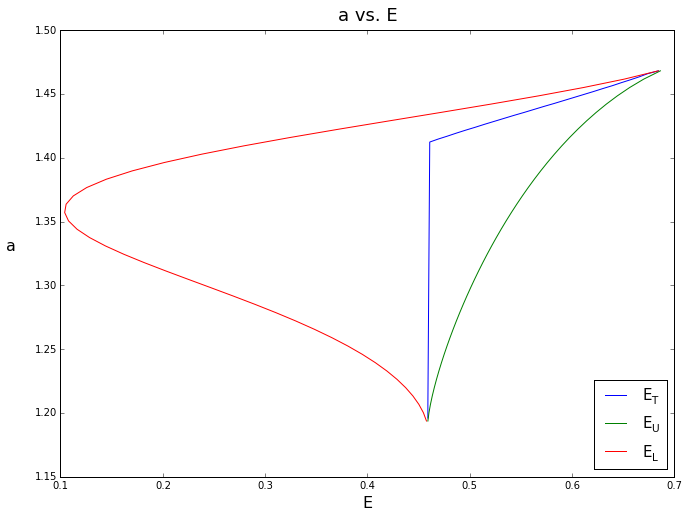

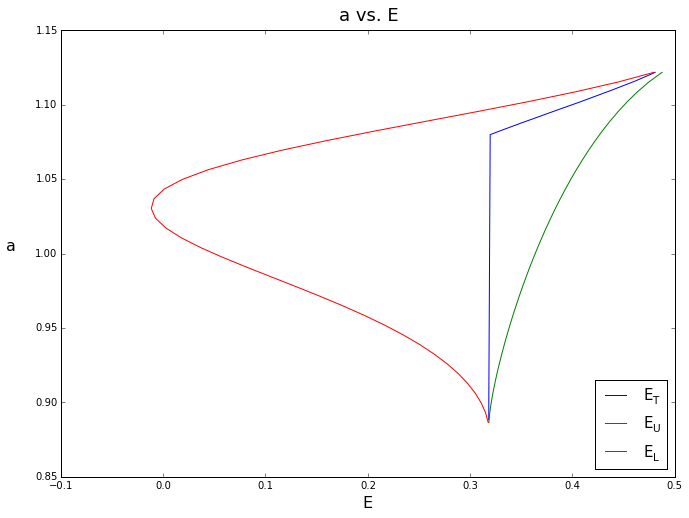

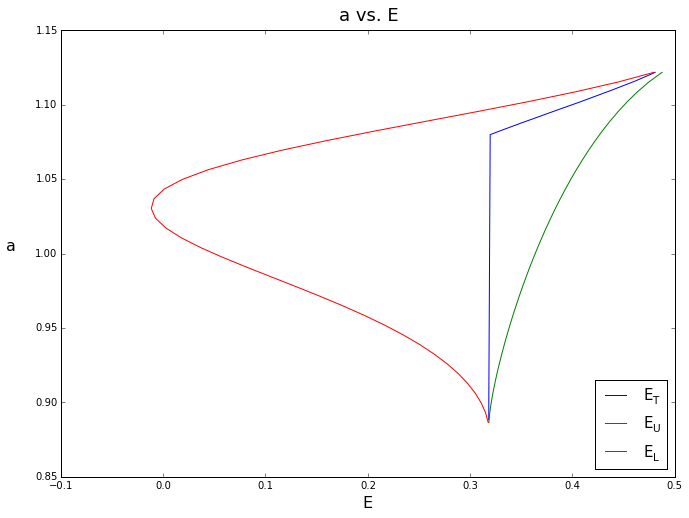

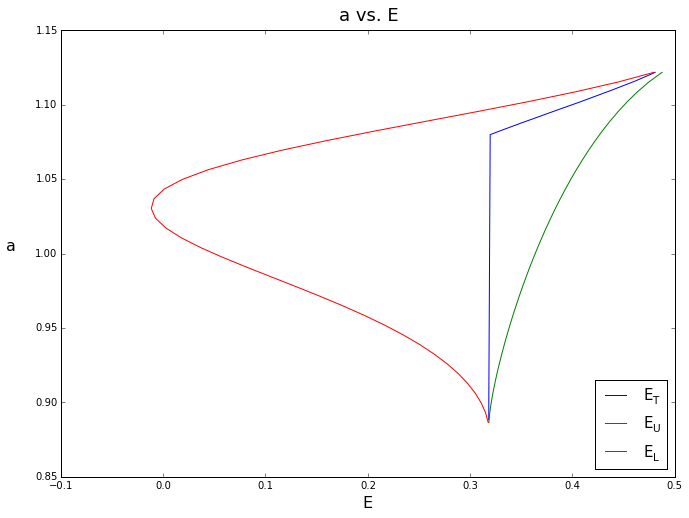

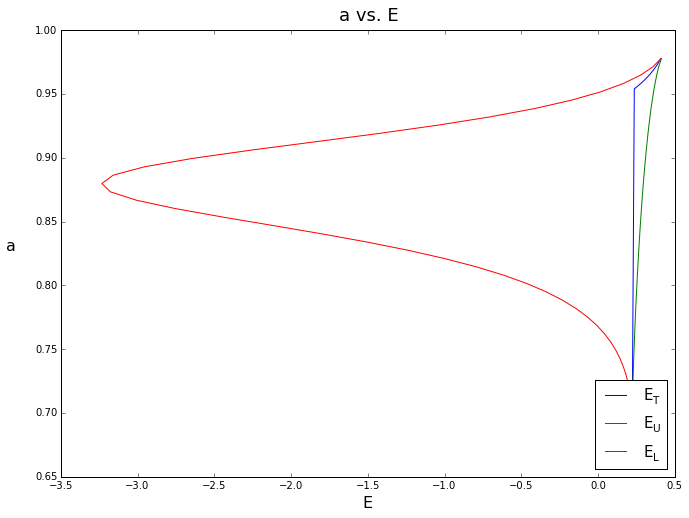

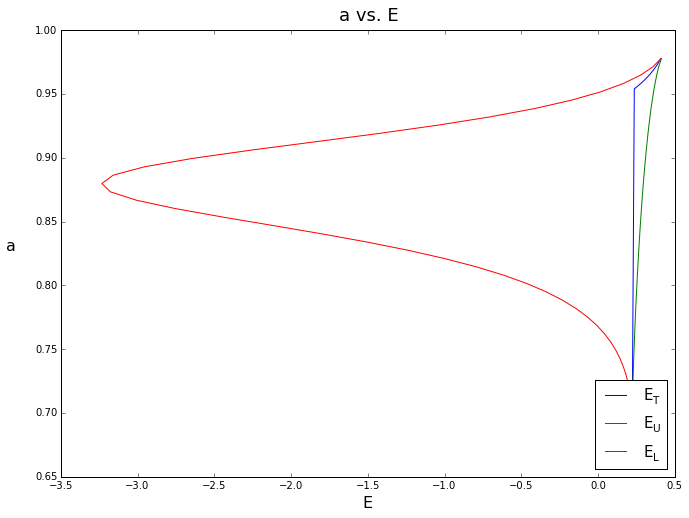

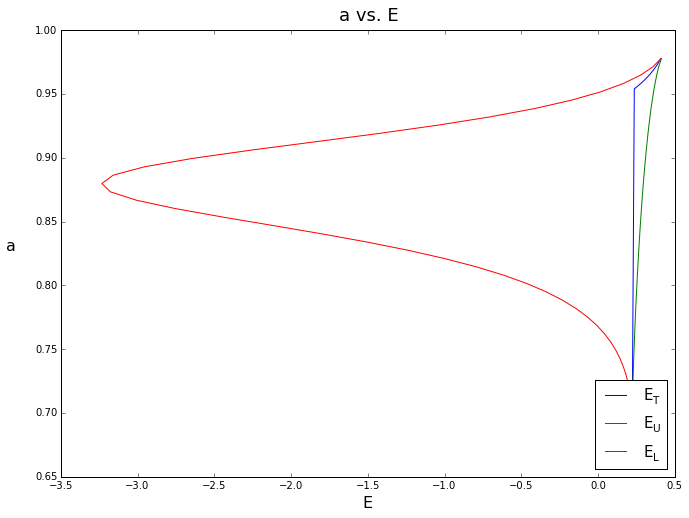

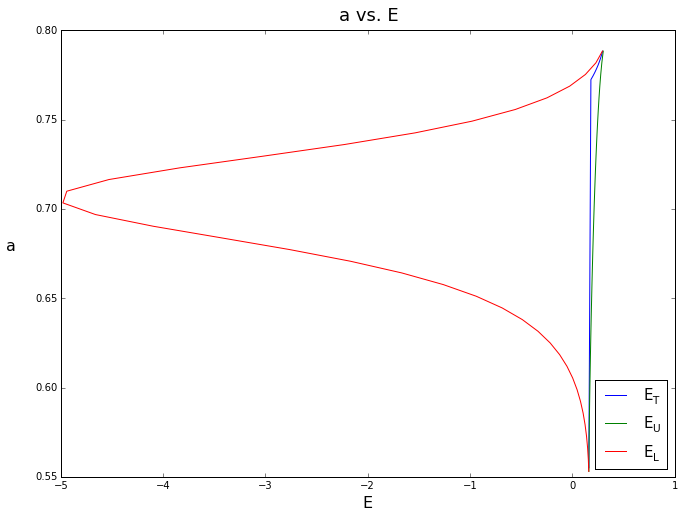

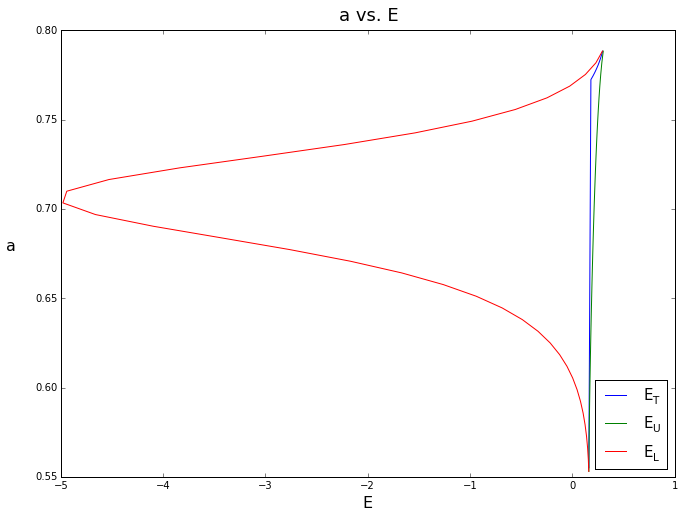

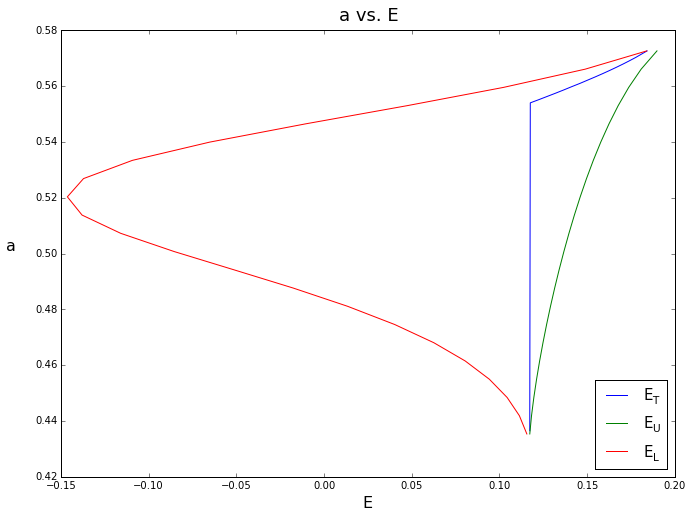

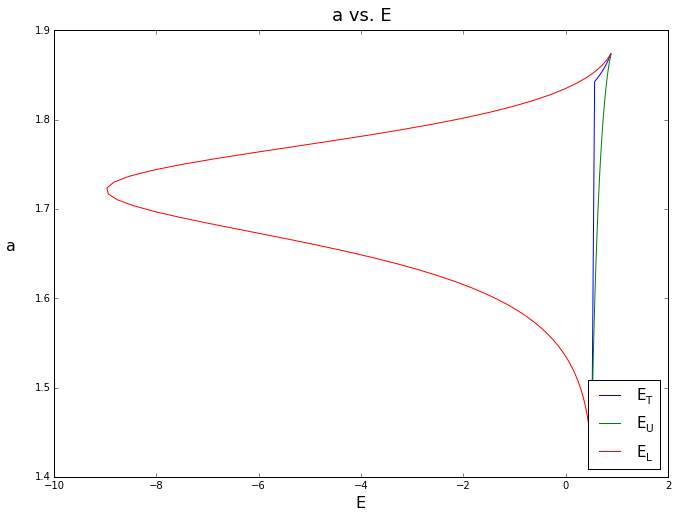

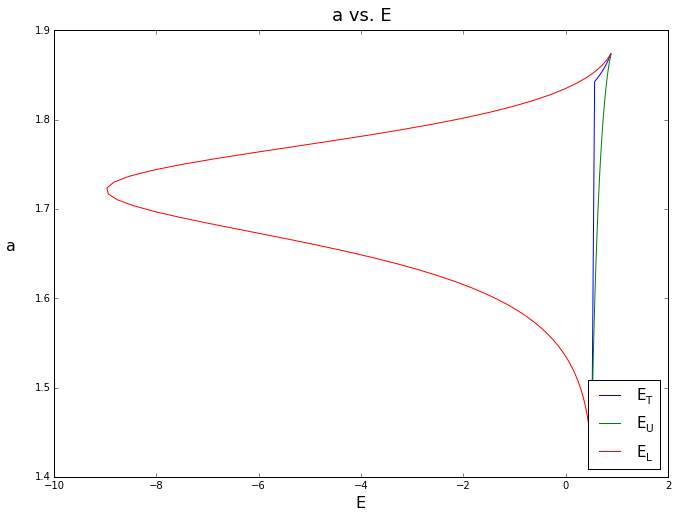

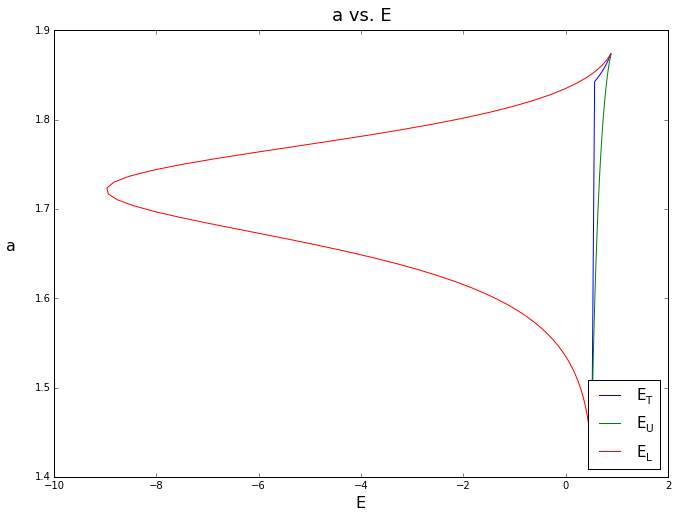

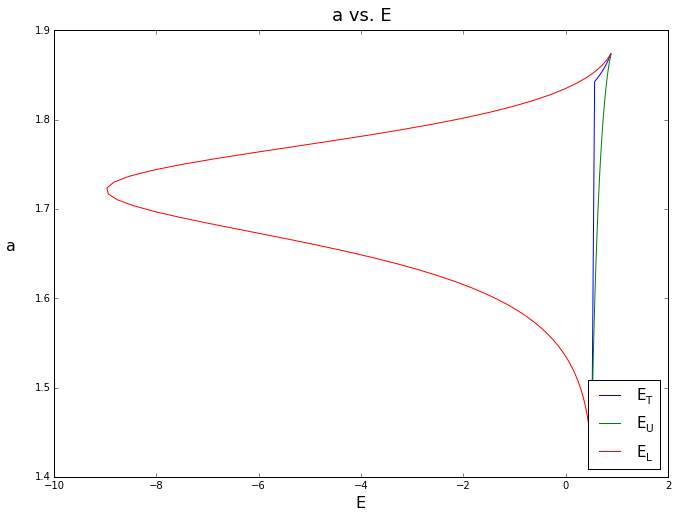

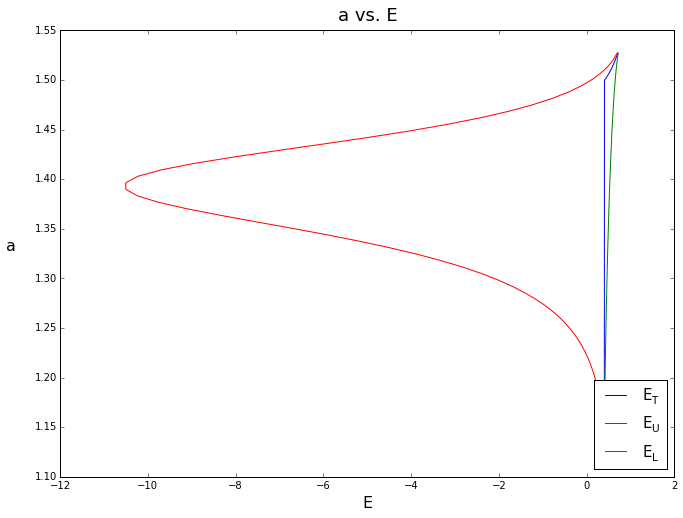

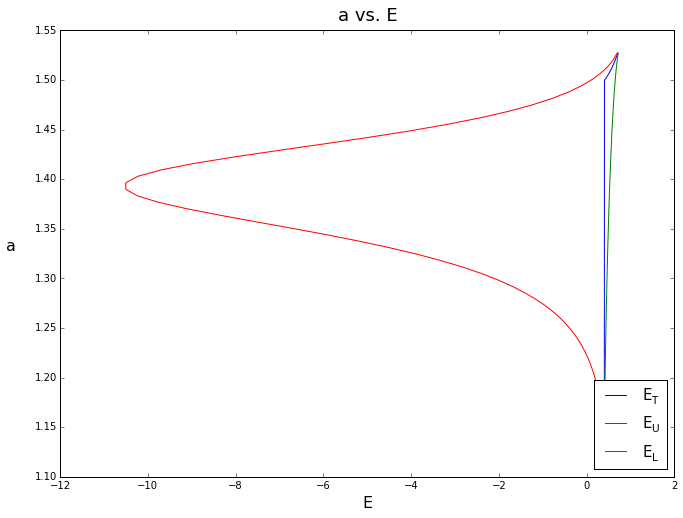

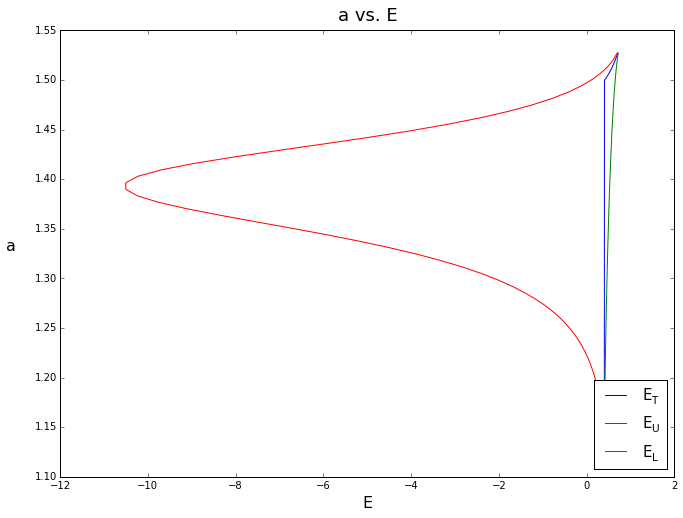

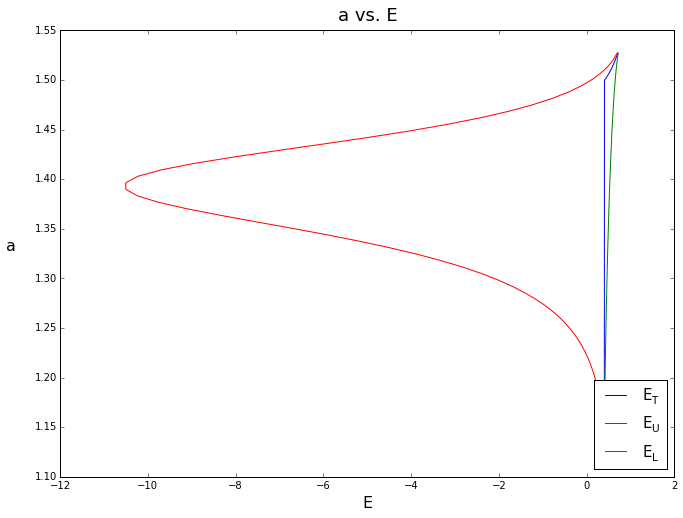

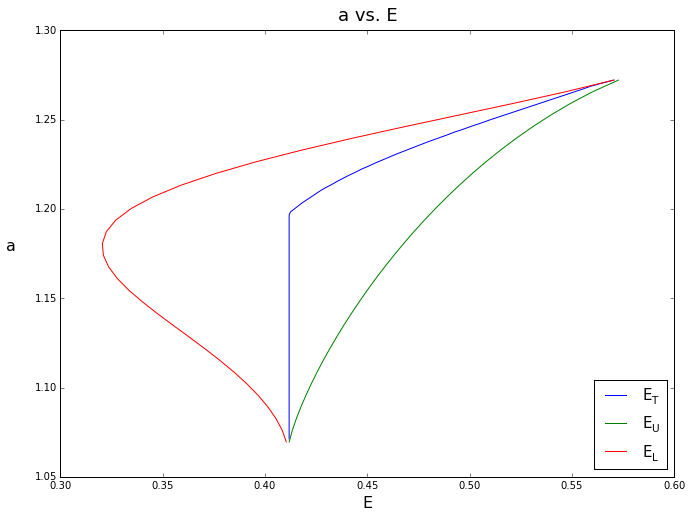

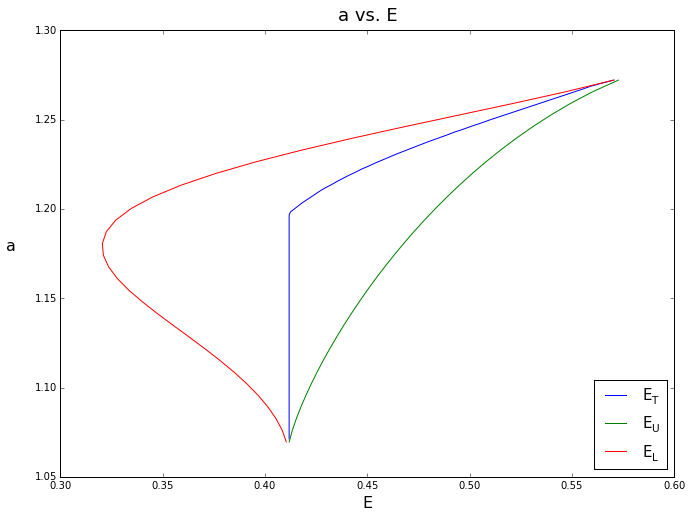

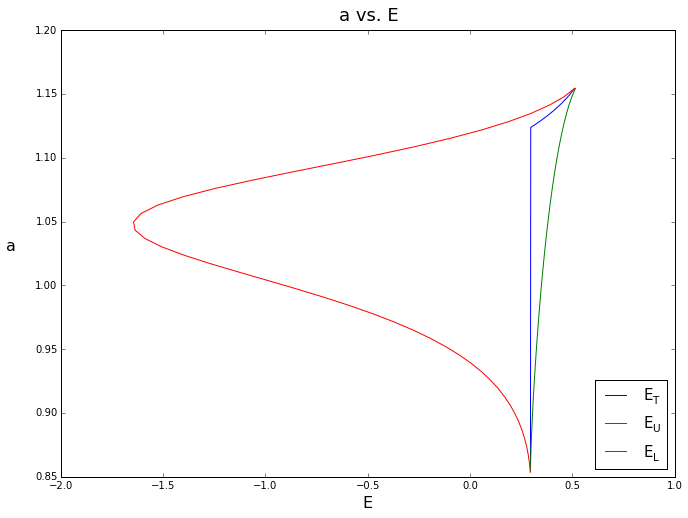

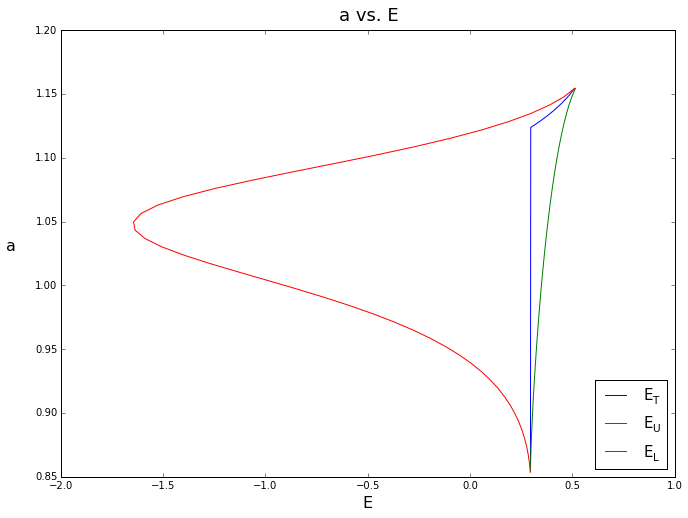

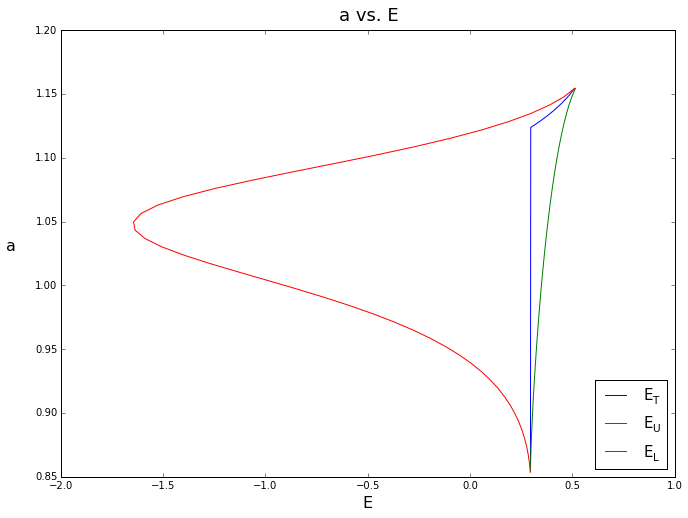

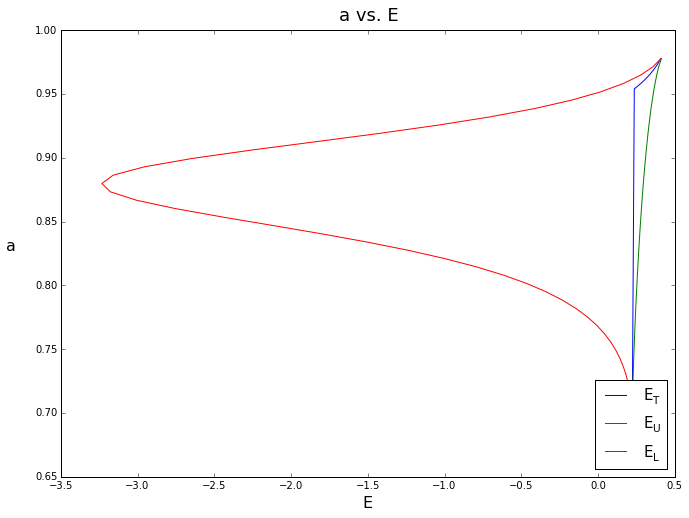

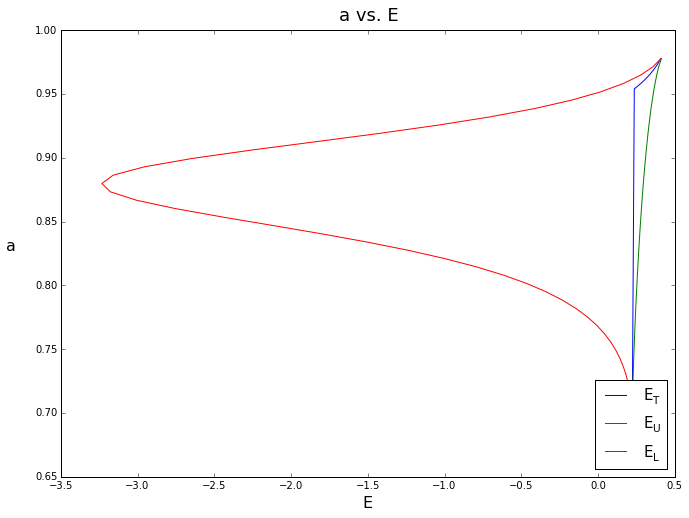

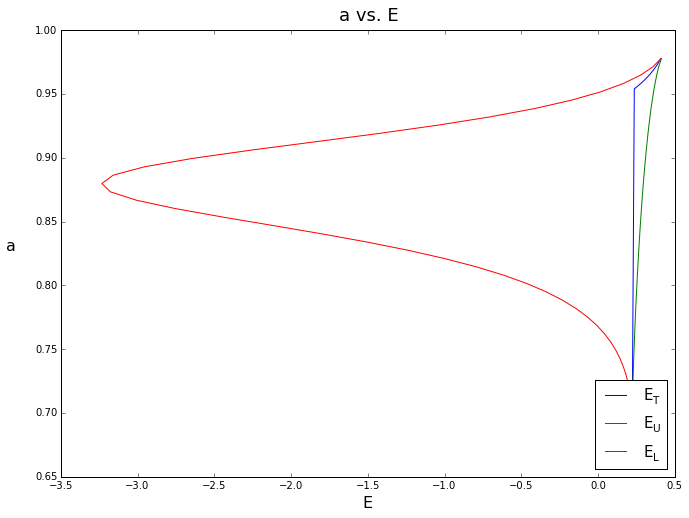

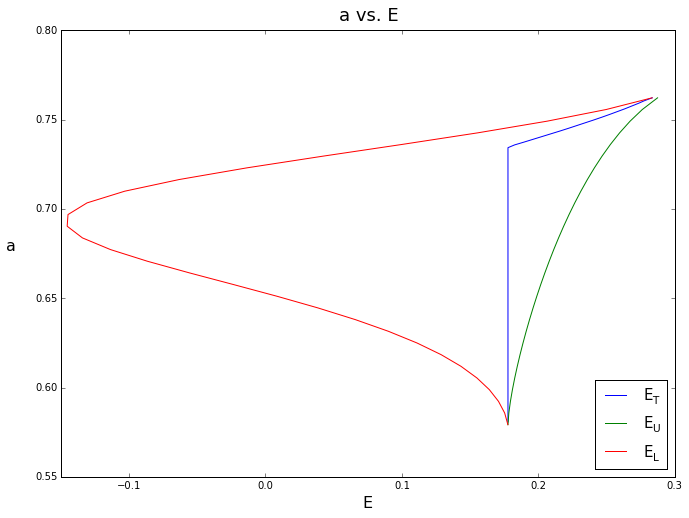

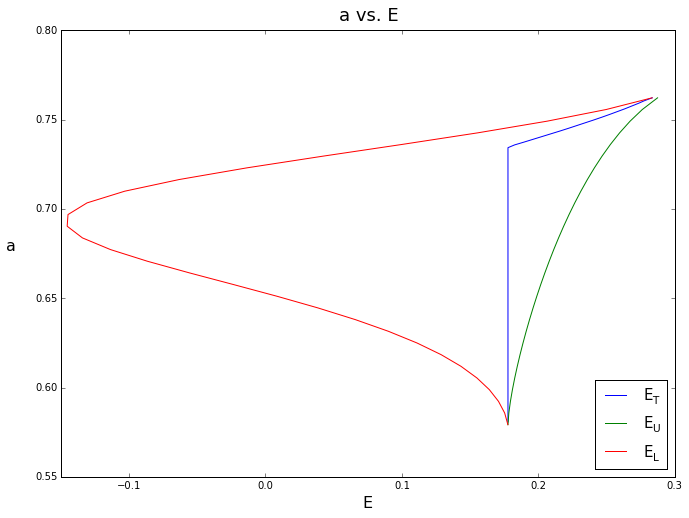

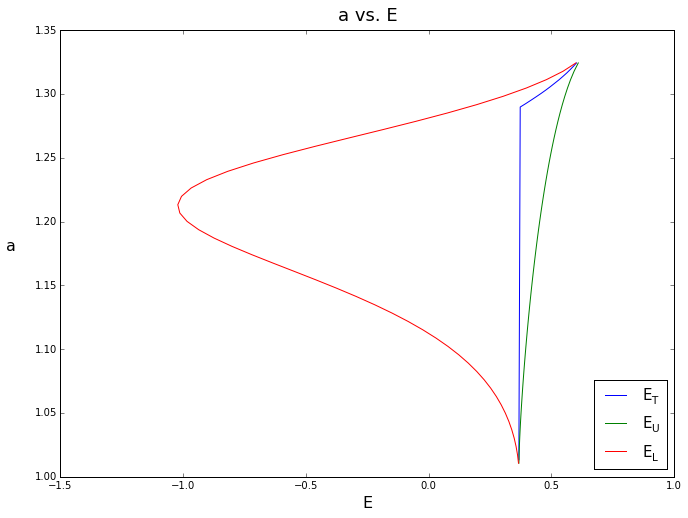

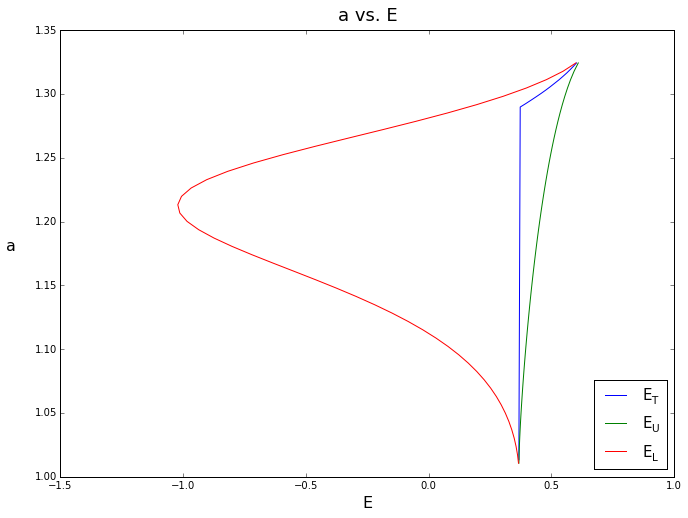

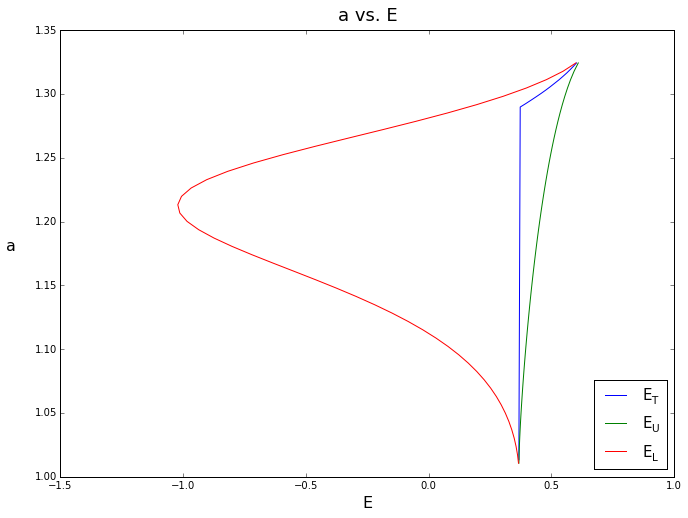

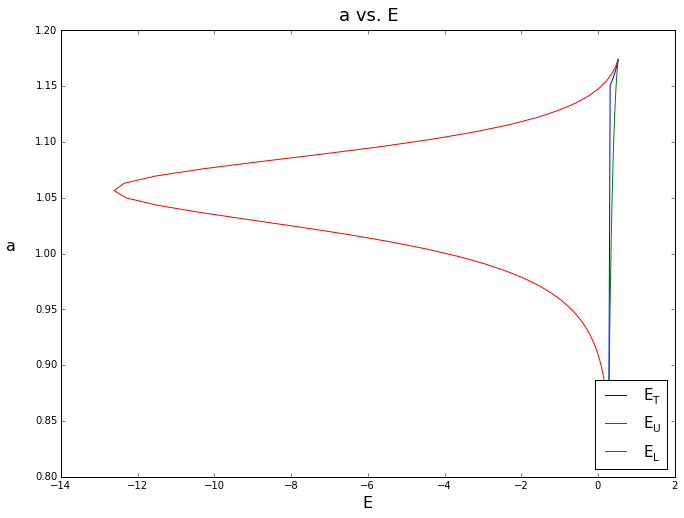

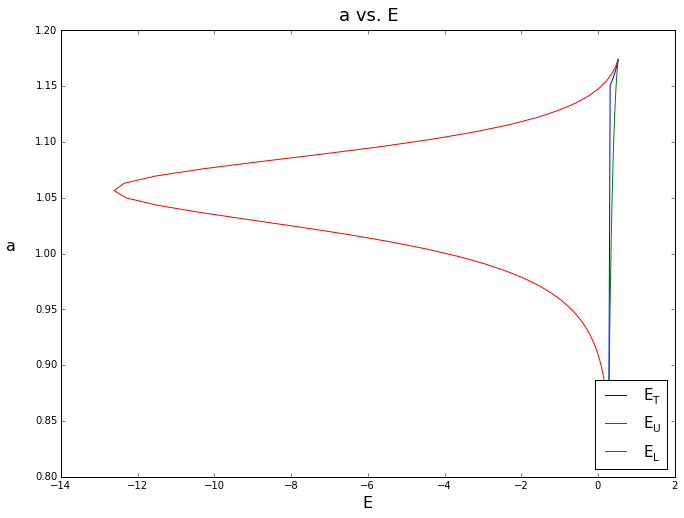

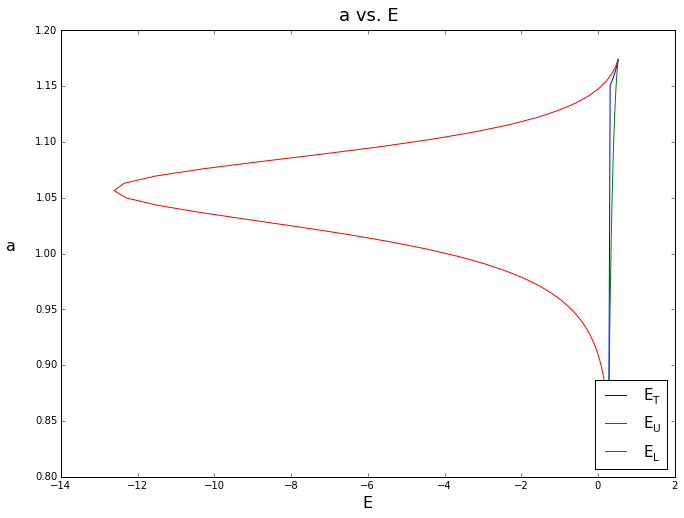

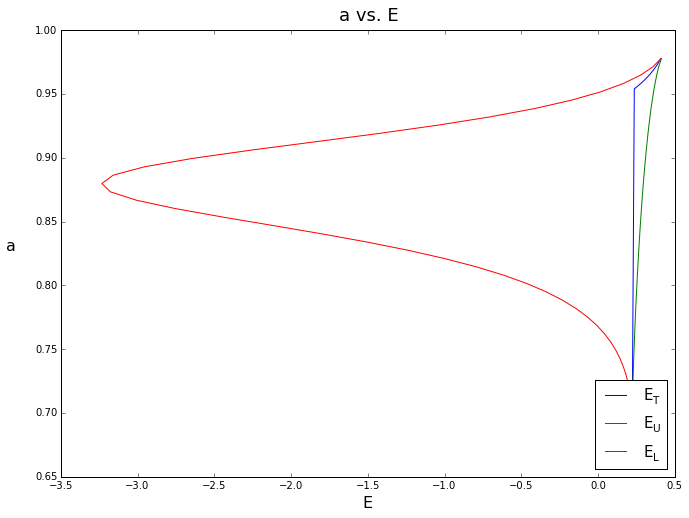

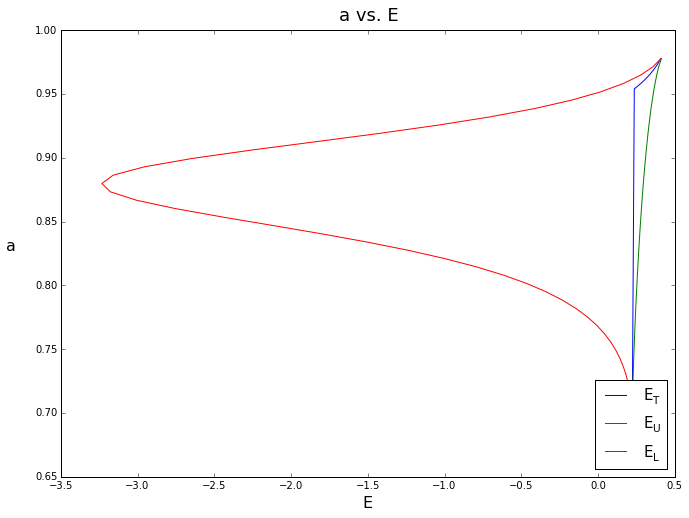

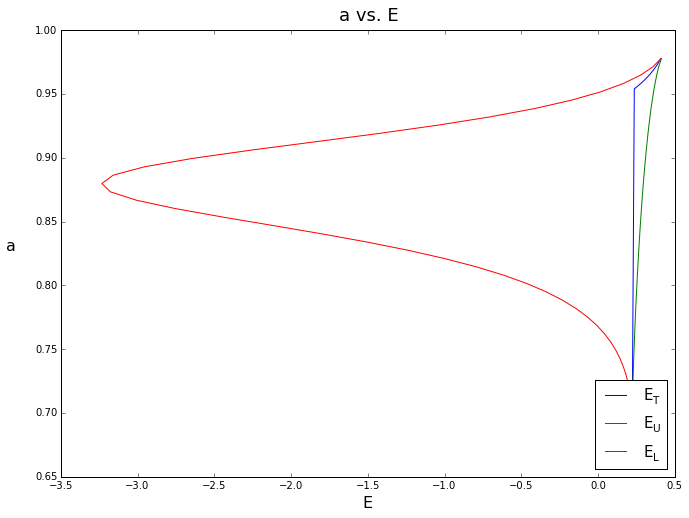

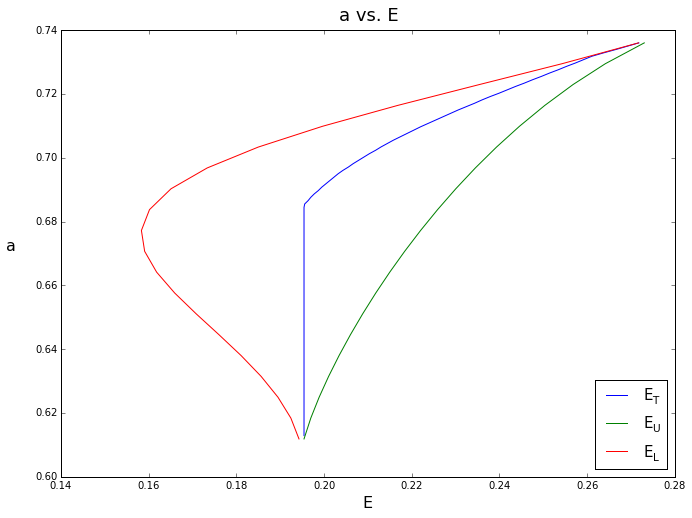

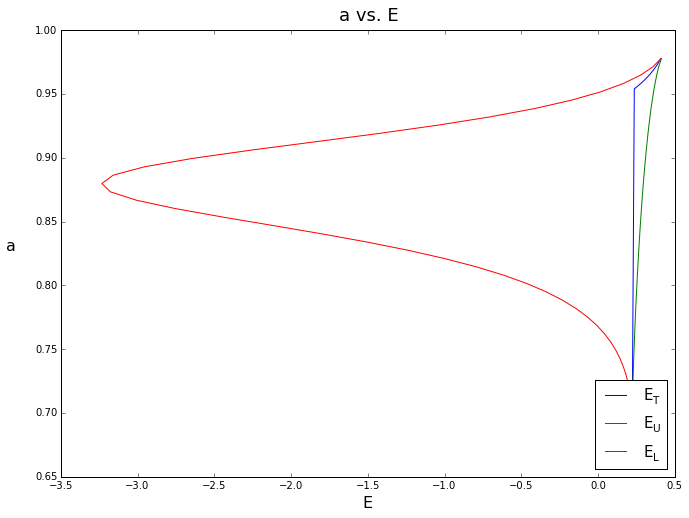

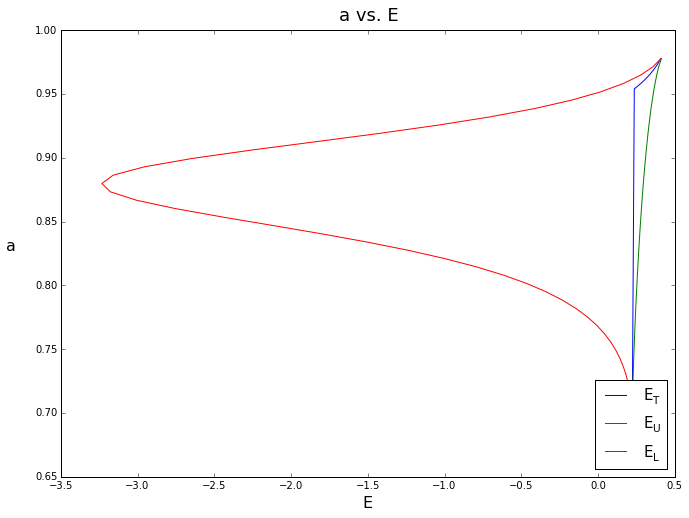

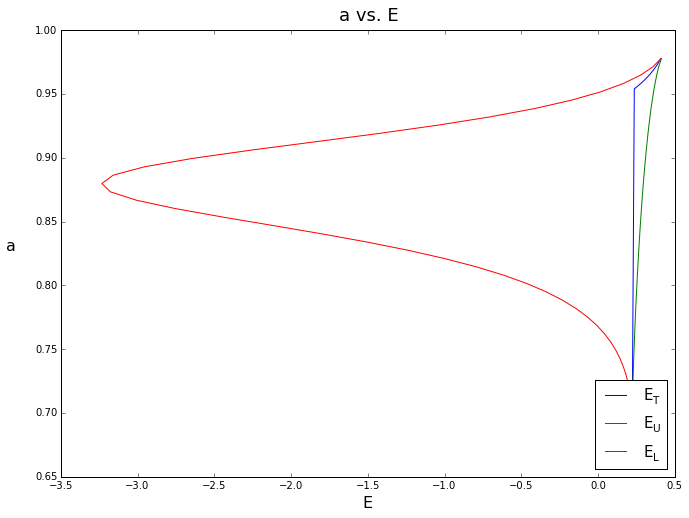

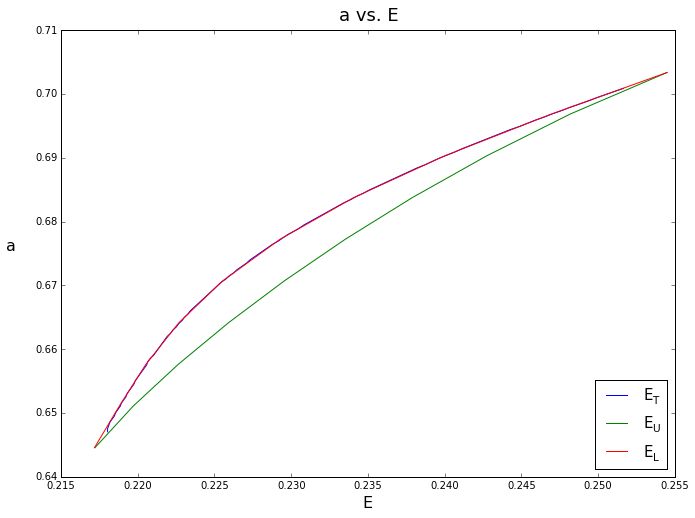

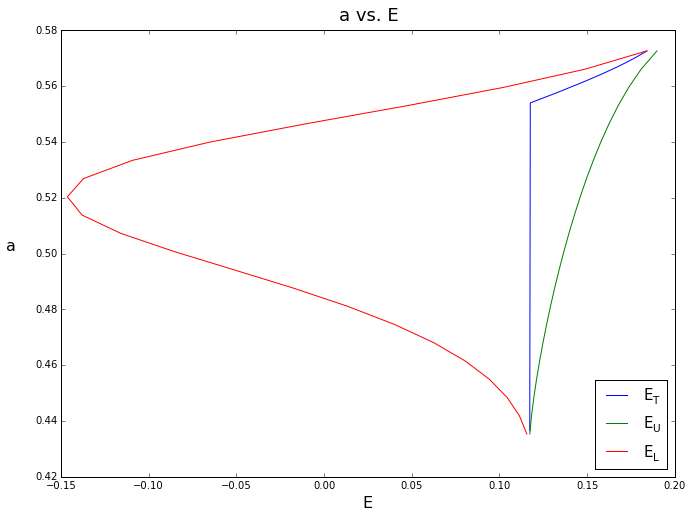

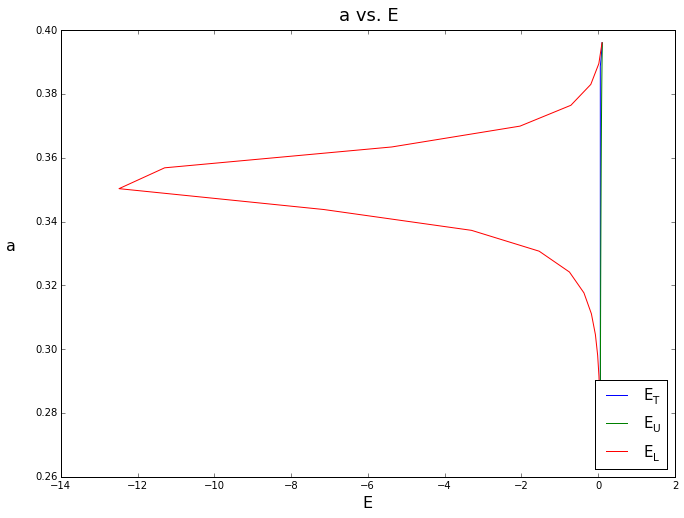

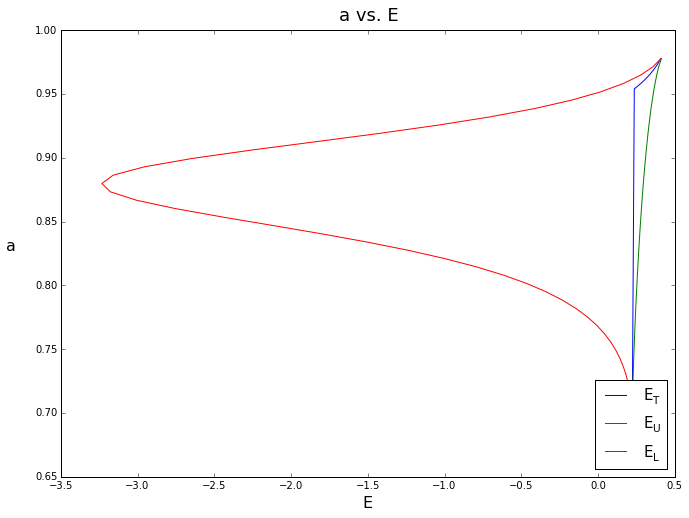

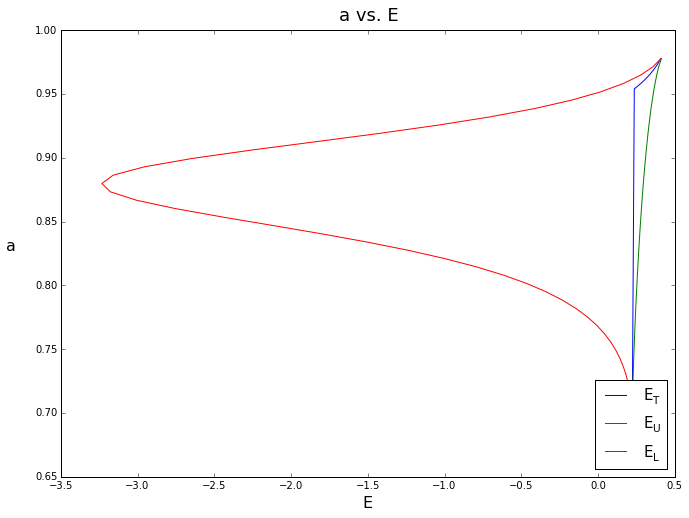

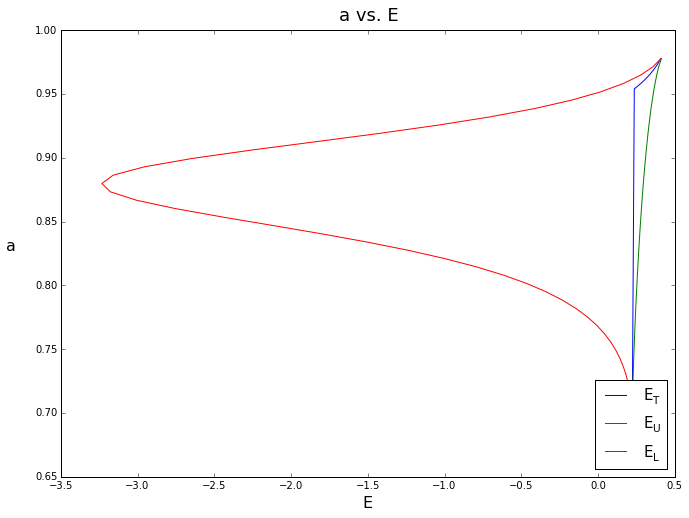

In [7]:
for i in range(len(vals)):
    plt.figure(figsize=(11,8))
    plt.plot(E_TT[i],a_TT[i],'b',label='$\mathregular{E_T}$')
    # plt.plot(Et[:54]+Et[90:],at[:54]+at[90:],'k--',label='$\mathregular{E_T}$ MATLAB')
    plt.plot(Eupper(np.array(a_U[i]),r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i]),np.array(a_U[i]),'g',label='$\mathregular{E_U}$')
    plt.plot(Elower(np.array(a_L[i]),r_p_val[i],u_p_val[i],v_p_val[i],u_c_val[i],v_c_val[i],e_val[i],gamma_val[i]),np.array(a_L[i]),'r',label='$\mathregular{E_L}$')
    plt.legend(loc='lower right',fontsize=15)
    plt.xlabel('E',fontsize=16)
    plt.ylabel('a',fontsize=16,rotation='horizontal',labelpad=25)
    plt.title('a vs. E',fontsize=18,y=1.01)
    
    plt.show()